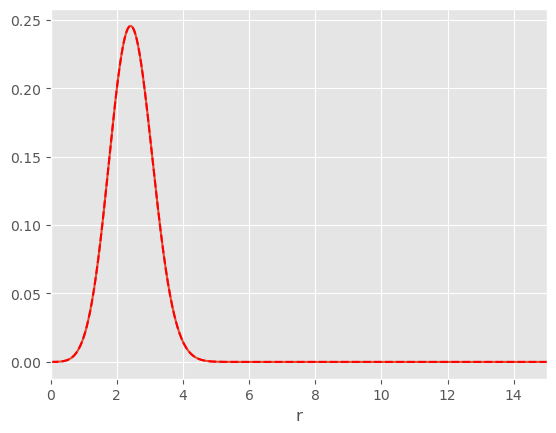

In [45]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline
mpl.style.use('ggplot')

N = 50                                                   # Truncation ordem

L0 = 2                                             # Map parameter 

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)
                               
colr = col[1:N+2]                                                         # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2)) 
r = np.flip(r1)                                           # physical domain (Verificado)  

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     



# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)                                    

r0 = 2

sigma = 1



# L0 = 2 and sigma = 1 r0 = 2 and Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

A0 =  0.05  #   0.05 -> disperse ;  #  0.0 -> colapse 

Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,15)
plt.show()


In [46]:
colr

array([9.99525720e-01, 9.98103329e-01, 9.95734176e-01, 9.92420510e-01,
       9.88165472e-01, 9.82973100e-01, 9.76848318e-01, 9.69796936e-01,
       9.61825643e-01, 9.52942000e-01, 9.43154434e-01, 9.32472229e-01,
       9.20905518e-01, 9.08465272e-01, 8.95163291e-01, 8.81012194e-01,
       8.66025404e-01, 8.50217136e-01, 8.33602385e-01, 8.16196912e-01,
       7.98017227e-01, 7.79080575e-01, 7.59404917e-01, 7.39008917e-01,
       7.17911923e-01, 6.96133946e-01, 6.73695644e-01, 6.50618300e-01,
       6.26923806e-01, 6.02634636e-01, 5.77773831e-01, 5.52364973e-01,
       5.26432163e-01, 5.00000000e-01, 4.73093557e-01, 4.45738356e-01,
       4.17960345e-01, 3.89785873e-01, 3.61241666e-01, 3.32354799e-01,
       3.03152674e-01, 2.73662990e-01, 2.43913720e-01, 2.13933083e-01,
       1.83749518e-01, 1.53391655e-01, 1.22888291e-01, 9.22683595e-02,
       6.15609061e-02, 3.07950586e-02, 6.12323400e-17])

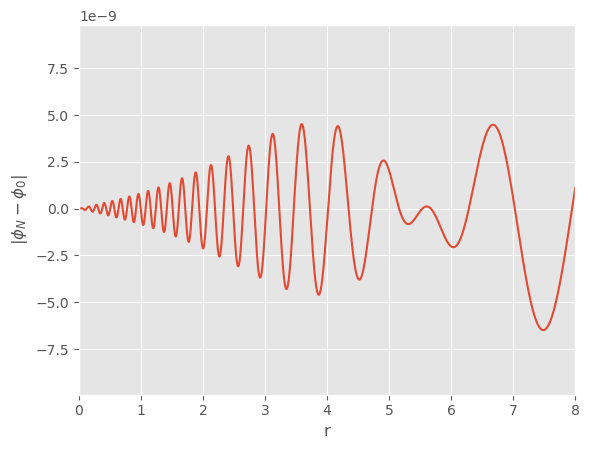

In [47]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [48]:
# Initial conditions for Alpha:

alpha0 = 1 - A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

al0 = np.dot(alpha0, inv_psi)

#Alpha_0 = np.dot(al0, psi)

# Initial values of Krr: Base functions of Krr

# In r = 0: 

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:]) 

inv_SB1 = np.linalg.inv(SB1[:,1:N+1]) #(N,N)


K0 = A0/20*r[1:N+1] **2*(np.exp(-(r[1:N+1] )**2/sigma**2) + np.exp(-(r[1:N+1])**2/sigma**2)) # N

fk0 = np.dot(K0, inv_SB1)

K = np.dot(fk0, SB1[:, 1:N+1])

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-18
#cnew = 0 
#err = abs(c0 - cnew)

n = 0
nf = 100
#nf =1
# Newton Raphson loop
#while max(err) >= tol:

while n <= nf:  
  Chi = np.dot(c0, psi)  
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2 - 1/2*np.exp(4*Chi[0])*(Pi[0]**2 + np.exp(-4*Chi[0])*rPhi[0]**2)
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] - np.exp(4*Chi[1:N+1])*K**2/4 + 1/2*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2)
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1] + 4*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*K/4 - 2*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) + 1/2*np.exp(4*Chi[1:N+1])*(4*psi[:,1:N+1]*np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) 
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1


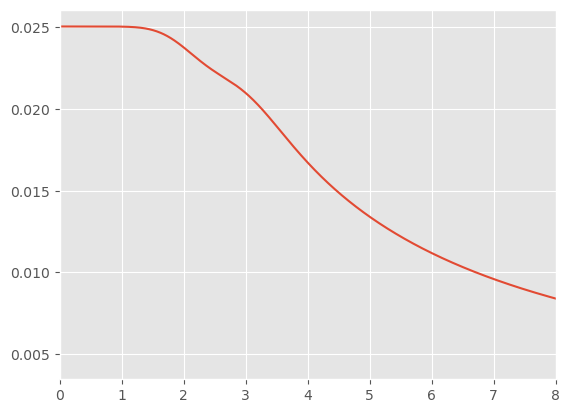

In [49]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,8)
plt.show()
     

In [50]:
# Equation for Krr: momentum constraint

# Base functions for Beta

SB2 = np.zeros([N,N+1])      
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [51]:
np.shape(SB2)

(50, 51)

In [52]:
np.shape(SB1)

(50, 51)

In [53]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [54]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

filter1 = np.ones(N+1)
#filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [55]:
2*np.dot(np.arange(1, 2*N + 2, 2), c0) 

0.06747594174038918

In [56]:
# Runge Kutta 4th order

h = 0.0005   # step size
tf = 10



It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

epsilon0 = 0.5
eta0 = 0.3

Madm_error = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi) 

  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)

  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)  
    
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)  
  rrAlpha = np.dot(al0, rrpsi)   

  K = np.dot(fk0, SB1[:, 1:N+1])
  rK = np.dot(fk0, rSB1[:, 1:N+1])  

  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1]  + rSB1[:,1:N+1]  + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r[1:N+1]*rChi[1:N+1])*np.exp(4*Chi[1:N+1])*K/r[1:N+1] + np.exp(4*Chi[1:N+1])*rK - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1])  
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1] - 1/2*Alpha[1:N+1]*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K**2 - np.exp(-4*Chi[1:N+1])*K*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK - epsilon0*eta0*K
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  M1 = h*(dal)
  P1 = h*(dfk)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  qK = np.dot(fk0, qSB1)  
  H = 4*rqChi**2 + 4*rrqChi + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 - 1/4*np.exp(4*qChi)*qK**2 + 1/2*np.exp(4*qChi)*(qPi**2 + np.exp(-4*qChi)*rqPhi**2) - qK*qKrr/2
  L2 = (1/2*np.dot(H**2,wq_col))**1/2  
  print(L2)
  L2HC.append(L2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
    
  # Error ADM mass:
  Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
  Madm_pc = abs(Madm - M0)/M0 * 100  
  Madm_error.append(Madm_pc)    
 
  # Second step
  Phi = np.dot(a0 + L1/2, psi)      
  rPhi = np.dot(a0 + L1/2, rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)      
  Pi = np.dot(b0 + N1/2, psi) 
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi) 
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi) 
    
  K = np.dot(fk0 + P1/2, SB1[:, 1:N+1])
  rK = np.dot(fk0 + P1/2, rSB1[:, 1:N+1])   
    
    
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1]  + rSB1[:,1:N+1]  + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r[1:N+1]*rChi[1:N+1])*np.exp(4*Chi[1:N+1])*K/r[1:N+1] + np.exp(4*Chi[1:N+1])*rK - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1])  
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1] - 1/2*Alpha[1:N+1]*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K**2 - np.exp(-4*Chi[1:N+1])*K*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK - epsilon0*eta0*K
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  M2 = h*(dal)
  P2 = h*(dfk)
  

  # Third step
  Phi = np.dot(a0 + L2/2, psi)      
  rPhi = np.dot(a0 + L2/2, rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)      
  Pi = np.dot(b0 + N2/2, psi) 
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi) 
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
    
  K = np.dot(fk0 + P2/2, SB1[:, 1:N+1])
  rK = np.dot(fk0 + P2/2, rSB1[:, 1:N+1]) 
    
    
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1]  + rSB1[:,1:N+1]  + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r[1:N+1]*rChi[1:N+1])*np.exp(4*Chi[1:N+1])*K/r[1:N+1] + np.exp(4*Chi[1:N+1])*rK - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1])  
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1] - 1/2*Alpha[1:N+1]*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K**2 - np.exp(-4*Chi[1:N+1])*K*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK - epsilon0*eta0*K
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)
  M3 = h*(dal)
  P3 = h*(dfk)


  # Forth step
  Phi = np.dot(a0 + L3/2, psi)      
  rPhi = np.dot(a0 + L3/2, rpsi)
  rrPhi = np.dot(a0 + L3/2, rrpsi)      
  Pi = np.dot(b0 + N3/2, psi) 
  rPi= np.dot(b0 + N3/2, rpsi)
  Chi = np.dot(c0 + K3/2, psi) 
  rChi = np.dot(c0 + K3/2, rpsi)
  rrChi = np.dot(c0 + K3/2, rrpsi)    

  K = np.dot(fk0 + P3/2, SB1[:, 1:N+1])
  rK = np.dot(fk0 + P3/2, rSB1[:, 1:N+1]) 

  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1]  + rSB1[:,1:N+1]  + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r[1:N+1]*rChi[1:N+1])*np.exp(4*Chi[1:N+1])*K/r[1:N+1] + np.exp(4*Chi[1:N+1])*rK - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1])  
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1] - 1/2*Alpha[1:N+1]*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K**2 - np.exp(-4*Chi[1:N+1])*K*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK - epsilon0*eta0*K
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)
  M4 = h*(dal)
  P4 = h*(dfk)

  
  t = t + h
#  print(t) 
#  if t > 9:
#    h=0.0001
 
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  al0 = al0 + 1/6 * (M1 + 2*M2 + 2*M3 + M4)
  fk0 = fk0 + 1/6 * (P1 + 2*P2 + 2*P3 + P4)   
    
  phi_set.append(np.dot(a0, psiplot))
  
  print('t =',t) 

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
out_a.close()
out_p.close() 
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

7.462568300693979e-15
t = 0.0005
5.081696112189596e-15
t = 0.001
3.6924575565667256e-15
t = 0.0015
3.339759685401854e-15
t = 0.002
4.093344990806732e-15
t = 0.0025
6.045339424019562e-15
t = 0.003
9.309069400572183e-15
t = 0.0035
1.4018350178744301e-14
t = 0.004
2.0326926388548133e-14
t = 0.0045000000000000005
2.840793723992121e-14
t = 0.005000000000000001
3.845335680131238e-14
t = 0.005500000000000001
5.067339135965631e-14
t = 0.006000000000000002
6.529582859484735e-14
t = 0.006500000000000002
8.256533828796171e-14
t = 0.007000000000000003
1.0274272617970927e-13
t = 0.007500000000000003
1.2610414320733777e-13
t = 0.008000000000000004
1.529402526485126e-13
t = 0.008500000000000004
1.8355535766404564e-13
t = 0.009000000000000005
2.182664918114218e-13
t = 0.009500000000000005
2.5740247512243824e-13
t = 0.010000000000000005
3.0130293832772256e-13
t = 0.010500000000000006
3.503173179079067e-13
t = 0.011000000000000006
4.048038246931766e-13
t = 0.011500000000000007
4.651283887643433e-13
t = 

t = 0.11650000000000009
1.0110566134579212e-10
t = 0.11700000000000009
1.0147136689065072e-10
t = 0.11750000000000009
1.0184107114062596e-10
t = 0.11800000000000009
1.0221485824223665e-10
t = 0.11850000000000009
1.0259281501952274e-10
t = 0.11900000000000009
1.0297503119683813e-10
t = 0.11950000000000009
1.0336159961758427e-10
t = 0.12000000000000009
1.0375261645965507e-10
t = 0.1205000000000001
1.0414818144640068e-10
t = 0.1210000000000001
1.0454839805344105e-10
t = 0.1215000000000001
1.0495337371081609e-10
t = 0.1220000000000001
1.0536321999999158e-10
t = 0.1225000000000001
1.0577805284495052e-10
t = 0.1230000000000001
1.0619799269825416e-10
t = 0.1235000000000001
1.0662316472045796e-10
t = 0.1240000000000001
1.0705369895362226e-10
t = 0.1245000000000001
1.07489730487296e-10
t = 0.12500000000000008
1.0793139961826177e-10
t = 0.12550000000000008
1.0837885200222155e-10
t = 0.12600000000000008
1.0883223879817465e-10
t = 0.12650000000000008
1.0929171680452756e-10
t = 0.12700000000000009


4.2430000423254255e-10
t = 0.20750000000000016
4.2775087123945797e-10
t = 0.20800000000000016
4.3120062448619755e-10
t = 0.20850000000000016
4.346487808362903e-10
t = 0.20900000000000016
4.380948669297895e-10
t = 0.20950000000000016
4.415384195127457e-10
t = 0.21000000000000016
4.4497898575366677e-10
t = 0.21050000000000016
4.4841612354355507e-10
t = 0.21100000000000016
4.5184940178270167e-10
t = 0.21150000000000016
4.552784006507e-10
t = 0.21200000000000016
4.5870271186276783e-10
t = 0.21250000000000016
4.621219389084202e-10
t = 0.21300000000000016
4.655356972767992e-10
t = 0.21350000000000016
4.689436146638053e-10
t = 0.21400000000000016
4.723453311655485e-10
t = 0.21450000000000016
4.757404994542469e-10
t = 0.21500000000000016
4.791287849389978e-10
t = 0.21550000000000016
4.825098659105799e-10
t = 0.21600000000000016
4.858834336696935e-10
t = 0.21650000000000016
4.892491926402036e-10
t = 0.21700000000000016
4.926068604659231e-10
t = 0.21750000000000017
4.959561680914076e-10
t = 0.21

t = 0.3025000000000002
1.014370131326308e-09
t = 0.3030000000000002
1.0179489504617925e-09
t = 0.3035000000000002
1.0215385659985413e-09
t = 0.3040000000000002
1.0251389150647263e-09
t = 0.3045000000000002
1.028749932424825e-09
t = 0.3050000000000002
1.0323715505555702e-09
t = 0.3055000000000002
1.0360036997209693e-09
t = 0.3060000000000002
1.0396463080498916e-09
t = 0.3065000000000002
1.043299301614136e-09
t = 0.3070000000000002
1.0469626045079882e-09
t = 0.3075000000000002
1.0506361389291526e-09
t = 0.3080000000000002
1.0543198252594552e-09
t = 0.3085000000000002
1.0580135821478443e-09
t = 0.3090000000000002
1.0617173265934376e-09
t = 0.3095000000000002
1.065430974029573e-09
t = 0.3100000000000002
1.0691544384101069e-09
t = 0.3105000000000002
1.072887632294347e-09
t = 0.3110000000000002
1.0766304669334155e-09
t = 0.3115000000000002
1.0803828523583987e-09
t = 0.3120000000000002
1.084144697467167e-09
t = 0.3125000000000002
1.0879159101137562e-09
t = 0.3130000000000002
1.091696397195787

t = 0.3960000000000003
1.8012850709827644e-09
t = 0.3965000000000003
1.8060141589211073e-09
t = 0.3970000000000003
1.8107512859283314e-09
t = 0.3975000000000003
1.8154965499937787e-09
t = 0.3980000000000003
1.8202500489022416e-09
t = 0.3985000000000003
1.825011880121216e-09
t = 0.3990000000000003
1.8297821406824681e-09
t = 0.3995000000000003
1.8345609270655624e-09
t = 0.4000000000000003
1.8393483350795725e-09
t = 0.4005000000000003
1.844144459745017e-09
t = 0.4010000000000003
1.8489493951750951e-09
t = 0.4015000000000003
1.8537632344568644e-09
t = 0.4020000000000003
1.858586069533138e-09
t = 0.4025000000000003
1.8634179910855423e-09
t = 0.4030000000000003
1.868259088416949e-09
t = 0.4035000000000003
1.873109449335097e-09
t = 0.4040000000000003
1.8779691600401264e-09
t = 0.4045000000000003
1.88283830501009e-09
t = 0.4050000000000003
1.8877169668911175e-09
t = 0.4055000000000003
1.8926052263884746e-09
t = 0.4060000000000003
1.89750316215984e-09
t = 0.4065000000000003
1.902410850711518e-0

t = 0.4960000000000004
2.91268378164506e-09
t = 0.4965000000000004
2.918797955643925e-09
t = 0.4970000000000004
2.924919623559858e-09
t = 0.4975000000000004
2.93104901144906e-09
t = 0.4980000000000004
2.93718634956899e-09
t = 0.4985000000000004
2.943331872276402e-09
t = 0.4990000000000004
2.9494858179108055e-09
t = 0.4995000000000004
2.9556484286900065e-09
t = 0.5000000000000003
2.9618199505978063e-09
t = 0.5005000000000003
2.9680006332777605e-09
t = 0.5010000000000002
2.974190729924236e-09
t = 0.5015000000000002
2.9803904971803866e-09
t = 0.5020000000000001
2.9866001950345573e-09
t = 0.5025000000000001
2.9928200867186727e-09
t = 0.503
2.9990504386179075e-09
t = 0.5035
3.0052915201723723e-09
t = 0.5039999999999999
3.0115436037930053e-09
t = 0.5044999999999998
3.0178069647777456e-09
t = 0.5049999999999998
3.0240818812338684e-09
t = 0.5054999999999997
3.030368634004292e-09
t = 0.5059999999999997
3.0366675066033014e-09
t = 0.5064999999999996
3.042978785155531e-09
t = 0.5069999999999996
3.

t = 0.5884999999999906
4.538515612069812e-09
t = 0.5889999999999905
4.552037684455809e-09
t = 0.5894999999999905
4.565619522539117e-09
t = 0.5899999999999904
4.5792610008581946e-09
t = 0.5904999999999904
4.592961987811856e-09
t = 0.5909999999999903
4.606722345041892e-09
t = 0.5914999999999903
4.620541926764678e-09
t = 0.5919999999999902
4.634420579063415e-09
t = 0.5924999999999901
4.648358139146981e-09
t = 0.5929999999999901
4.662354434560735e-09
t = 0.59349999999999
4.676409282355728e-09
t = 0.59399999999999
4.6905224882375384e-09
t = 0.5944999999999899
4.704693845659375e-09
t = 0.5949999999999899
4.718923134899626e-09
t = 0.5954999999999898
4.7332101220880294e-09
t = 0.5959999999999898
4.747554558216544e-09
t = 0.5964999999999897
4.761956178112977e-09
t = 0.5969999999999897
4.7764146993893164e-09
t = 0.5974999999999896
4.790929821362696e-09
t = 0.5979999999999895
4.805501223957087e-09
t = 0.5984999999999895
4.820128566580289e-09
t = 0.5989999999999894
4.834811486983379e-09
t = 0.5994

t = 0.7019999999999781
6.661115299920734e-09
t = 0.702499999999978
6.654318324594578e-09
t = 0.702999999999978
6.647327564021624e-09
t = 0.7034999999999779
6.640143605385674e-09
t = 0.7039999999999779
6.632767150114045e-09
t = 0.7044999999999778
6.625199017738637e-09
t = 0.7049999999999778
6.617440149611189e-09
t = 0.7054999999999777
6.609491612483166e-09
t = 0.7059999999999776
6.601354601897734e-09
t = 0.7064999999999776
6.593030445408624e-09
t = 0.7069999999999775
6.584520605622135e-09
t = 0.7074999999999775
6.575826683043802e-09
t = 0.7079999999999774
6.566950418717174e-09
t = 0.7084999999999774
6.55789369666165e-09
t = 0.7089999999999773
6.5486585460855844e-09
t = 0.7094999999999773
6.539247143399276e-09
t = 0.7099999999999772
6.529661813963516e-09
t = 0.7104999999999771
6.5199050336571835e-09
t = 0.7109999999999771
6.509979430161841e-09
t = 0.711499999999977
6.499887784032568e-09
t = 0.711999999999977
6.489633029528303e-09
t = 0.7124999999999769
6.47921825518732e-09
t = 0.71299999

t = 0.8164999999999655
1.0975563507504914e-08
t = 0.8169999999999654
1.1076760952721326e-08
t = 0.8174999999999654
1.1178875148382362e-08
t = 0.8179999999999653
1.1281900780958662e-08
t = 0.8184999999999653
1.1385832469572325e-08
t = 0.8189999999999652
1.1490664770564297e-08
t = 0.8194999999999651
1.1596392181817507e-08
t = 0.8199999999999651
1.1703009146856587e-08
t = 0.820499999999965
1.1810510058710984e-08
t = 0.820999999999965
1.1918889263468966e-08
t = 0.8214999999999649
1.2028141063619249e-08
t = 0.8219999999999649
1.2138259721027076e-08
t = 0.8224999999999648
1.2249239459661622e-08
t = 0.8229999999999648
1.2361074467978829e-08
t = 0.8234999999999647
1.2473758900990966e-08
t = 0.8239999999999646
1.258728688199869e-08
t = 0.8244999999999646
1.2701652503968836e-08
t = 0.8249999999999645
1.2816849830539535e-08
t = 0.8254999999999645
1.2932872896737272e-08
t = 0.8259999999999644
1.3049715709219591e-08
t = 0.8264999999999644
1.3167372246241889e-08
t = 0.8269999999999643
1.328583645717

3.301504974030094e-08
t = 0.9319999999999528
3.295177945556413e-08
t = 0.9324999999999527
3.288631075420843e-08
t = 0.9329999999999526
3.2818645892531686e-08
t = 0.9334999999999526
3.274878746147343e-08
t = 0.9339999999999525
3.267673840246971e-08
t = 0.9344999999999525
3.260250202359479e-08
t = 0.9349999999999524
3.25260820159423e-08
t = 0.9354999999999524
3.2447482470185376e-08
t = 0.9359999999999523
3.236670789335717e-08
t = 0.9364999999999523
3.2283763225670065e-08
t = 0.9369999999999522
3.219865385747761e-08
t = 0.9374999999999521
3.211138564621316e-08
t = 0.9379999999999521
3.202196493335937e-08
t = 0.938499999999952
3.1930398561330014e-08
t = 0.938999999999952
3.1836693890280974e-08
t = 0.9394999999999519
3.174085881473613e-08
t = 0.9399999999999519
3.164290178008825e-08
t = 0.9404999999999518
3.154283179881149e-08
t = 0.9409999999999518
3.144065846644809e-08
t = 0.9414999999999517
3.133639197725711e-08
t = 0.9419999999999517
3.1230043139537e-08
t = 0.9424999999999516
3.11216233

t = 1.0344999999999416
1.711949216650807e-08
t = 1.0349999999999415
1.7386631237279882e-08
t = 1.0354999999999415
1.7660916175945626e-08
t = 1.0359999999999414
1.7942382757560035e-08
t = 1.0364999999999414
1.8231065740060462e-08
t = 1.0369999999999413
1.8526998858090635e-08
t = 1.0374999999999412
1.8830214817780243e-08
t = 1.0379999999999412
1.9140745292516344e-08
t = 1.0384999999999411
1.9458620919624823e-08
t = 1.038999999999941
1.9783871298030447e-08
t = 1.039499999999941
2.0116524986825817e-08
t = 1.039999999999941
2.045660950477222e-08
t = 1.040499999999941
2.080415133063371e-08
t = 1.0409999999999409
2.1159175904442065e-08
t = 1.0414999999999408
2.152170762953903e-08
t = 1.0419999999999408
2.1891769875438228e-08
t = 1.0424999999999407
2.2269384981468636e-08
t = 1.0429999999999406
2.2654574261101443e-08
t = 1.0434999999999406
2.304735800700447e-08
t = 1.0439999999999405
2.344775549672886e-08
t = 1.0444999999999405
2.385578499895954e-08
t = 1.0449999999999404
2.4271463780358674e-08

t = 1.129999999999931
1.815357665420992e-07
t = 1.130499999999931
1.825714198309385e-07
t = 1.130999999999931
1.8360209002873272e-07
t = 1.131499999999931
1.8462768683587578e-07
t = 1.1319999999999308
1.856481207254884e-07
t = 1.1324999999999308
1.866633028972112e-07
t = 1.1329999999999307
1.87673145229995e-07
t = 1.1334999999999307
1.8867756023477523e-07
t = 1.1339999999999306
1.8967646100642595e-07
t = 1.1344999999999306
1.906697611758958e-07
t = 1.1349999999999305
1.916573748622921e-07
t = 1.1354999999999305
1.9263921662513647e-07
t = 1.1359999999999304
1.9361520141739236e-07
t = 1.1364999999999303
1.945852445388328e-07
t = 1.1369999999999303
1.9554926159053638e-07
t = 1.1374999999999302
1.9650716843039332e-07
t = 1.1379999999999302
1.9745888112982147e-07
t = 1.1384999999999301
1.9840431593207597e-07
t = 1.13899999999993
1.993433892121702e-07
t = 1.13949999999993
2.002760174387634e-07
t = 1.13999999999993
2.0120211713792685e-07
t = 1.14049999999993
2.0212160485941798e-07
t = 1.14099

t = 1.2409999999999188
2.586246348421671e-07
t = 1.2414999999999188
2.592411867068416e-07
t = 1.2419999999999187
2.5987600929285883e-07
t = 1.2424999999999187
2.605293474033047e-07
t = 1.2429999999999186
2.6120144709428344e-07
t = 1.2434999999999186
2.618925556529687e-07
t = 1.2439999999999185
2.6260292157035825e-07
t = 1.2444999999999184
2.633327945071747e-07
t = 1.2449999999999184
2.64082425252687e-07
t = 1.2454999999999183
2.6485206567818055e-07
t = 1.2459999999999183
2.656419686824199e-07
t = 1.2464999999999182
2.664523881319816e-07
t = 1.2469999999999182
2.672835787944091e-07
t = 1.2474999999999181
2.6813579626504366e-07
t = 1.247999999999918
2.690092968878996e-07
t = 1.248499999999918
2.699043376701174e-07
t = 1.248999999999918
2.708211761905314e-07
t = 1.249499999999918
2.717600705021336e-07
t = 1.2499999999999178
2.7272127902910697e-07
t = 1.2504999999999178
2.73705060457981e-07
t = 1.2509999999999177
2.7471167362350496e-07
t = 1.2514999999999177
2.757413773897258e-07
t = 1.251

t = 1.3459999999999073
9.92691994092802e-07
t = 1.3464999999999072
9.986812237760448e-07
t = 1.3469999999999072
1.004676556661417e-06
t = 1.347499999999907
1.0106775467788256e-06
t = 1.347999999999907
1.0166837461727355e-06
t = 1.348499999999907
1.0226947050779653e-06
t = 1.348999999999907
1.028709972099004e-06
t = 1.3494999999999069
1.0347290943908052e-06
t = 1.3499999999999068
1.0407516178415293e-06
t = 1.3504999999999068
1.0467770872568556e-06
t = 1.3509999999999067
1.0528050465449651e-06
t = 1.3514999999999067
1.0588350389023952e-06
t = 1.3519999999999066
1.0648666070005508e-06
t = 1.3524999999999066
1.070899293171635e-06
t = 1.3529999999999065
1.0769326395939297e-06
t = 1.3534999999999064
1.0829661884778627e-06
t = 1.3539999999999064
1.0889994822492573e-06
t = 1.3544999999999063
1.0950320637316025e-06
t = 1.3549999999999063
1.1010634763265935e-06
t = 1.3554999999999062
1.1070932641931854e-06
t = 1.3559999999999062
1.1131209724222892e-06
t = 1.3564999999999061
1.119146147210767e-06

t = 1.4414999999998968
1.8057435714219796e-06
t = 1.4419999999998967
1.8062844008879649e-06
t = 1.4424999999998966
1.806771943458109e-06
t = 1.4429999999998966
1.8072062314108737e-06
t = 1.4434999999998965
1.8075873057389349e-06
t = 1.4439999999998965
1.8079152160694358e-06
t = 1.4444999999998964
1.8081900205810325e-06
t = 1.4449999999998964
1.8084117859106218e-06
t = 1.4454999999998963
1.8085805870554306e-06
t = 1.4459999999998963
1.8086965072652874e-06
t = 1.4464999999998962
1.808759637931518e-06
t = 1.4469999999998961
1.8087700784679536e-06
t = 1.447499999999896
1.8087279361855428e-06
t = 1.447999999999896
1.8086333261630004e-06
t = 1.448499999999896
1.8084863711112088e-06
t = 1.448999999999896
1.8082872012316114e-06
t = 1.4494999999998959
1.8080359540718314e-06
t = 1.4499999999998958
1.8077327743756017e-06
t = 1.4504999999998958
1.8073778139293628e-06
t = 1.4509999999998957
1.8069712314044067e-06
t = 1.4514999999998957
1.8065131921965442e-06
t = 1.4519999999998956
1.806003868262658

t = 1.5364999999998863
1.2555094503719466e-06
t = 1.5369999999998862
1.2520097206632727e-06
t = 1.5374999999998862
1.2485491886037559e-06
t = 1.5379999999998861
1.2451287200110715e-06
t = 1.538499999999886
1.2417491784411513e-06
t = 1.538999999999886
1.2384114250646508e-06
t = 1.539499999999886
1.2351163185509203e-06
t = 1.539999999999886
1.2318647149589448e-06
t = 1.5404999999998858
1.2286574676339328e-06
t = 1.5409999999998858
1.2254954271128773e-06
t = 1.5414999999998857
1.2223794410355561e-06
t = 1.5419999999998857
1.219310354062918e-06
t = 1.5424999999998856
1.216289007803756e-06
t = 1.5429999999998856
1.2133162407466989e-06
t = 1.5434999999998855
1.2103928882010538e-06
t = 1.5439999999998855
1.207519782242182e-06
t = 1.5444999999998854
1.2046977516679082e-06
t = 1.5449999999998854
1.2019276219566894e-06
t = 1.5454999999998853
1.1992102152370292e-06
t = 1.5459999999998852
1.1965463502609057e-06
t = 1.5464999999998852
1.1939368423854954e-06
t = 1.5469999999998851
1.1913825035597322

2.011099974936749e-06
t = 1.628999999999876
2.0256812355073657e-06
t = 1.629499999999876
2.040378788596042e-06
t = 1.629999999999876
2.055192057910363e-06
t = 1.630499999999876
2.0701204555305248e-06
t = 1.6309999999998759
2.085163382136287e-06
t = 1.6314999999998758
2.1003202272338843e-06
t = 1.6319999999998758
2.1155903693810533e-06
t = 1.6324999999998757
2.130973176411396e-06
t = 1.6329999999998757
2.1464680056572777e-06
t = 1.6334999999998756
2.1620742041696277e-06
t = 1.6339999999998756
2.1777911089356416e-06
t = 1.6344999999998755
2.193618047093544e-06
t = 1.6349999999998754
2.209554336143634e-06
t = 1.6354999999998754
2.225599284155356e-06
t = 1.6359999999998753
2.2417521899706044e-06
t = 1.6364999999998753
2.258012343401473e-06
t = 1.6369999999998752
2.274379025423809e-06
t = 1.6374999999998752
2.2908515083654776e-06
t = 1.6379999999998751
2.307429056087522e-06
t = 1.638499999999875
2.324110924160767e-06
t = 1.638999999999875
2.340896360035752e-06
t = 1.639499999999875
2.357784

t = 1.7224999999998658
5.738930669537622e-06
t = 1.7229999999998658
5.756124227551018e-06
t = 1.7234999999998657
5.7731911984108505e-06
t = 1.7239999999998656
5.790130179728146e-06
t = 1.7244999999998656
5.80693978049328e-06
t = 1.7249999999998655
5.823618621087342e-06
t = 1.7254999999998655
5.840165333287724e-06
t = 1.7259999999998654
5.856578560262315e-06
t = 1.7264999999998654
5.8728569565576165e-06
t = 1.7269999999998653
5.888999188078029e-06
t = 1.7274999999998653
5.905003932059458e-06
t = 1.7279999999998652
5.92086987703389e-06
t = 1.7284999999998651
5.936595722789126e-06
t = 1.728999999999865
5.952180180322011e-06
t = 1.729499999999865
5.967621971785227e-06
t = 1.729999999999865
5.9829198304301395e-06
t = 1.730499999999865
5.998072500543645e-06
t = 1.7309999999998649
6.01307873738181e-06
t = 1.7314999999998648
6.027937307098371e-06
t = 1.7319999999998648
6.042646986671371e-06
t = 1.7324999999998647
6.057206563825777e-06
t = 1.7329999999998646
6.071614836954512e-06
t = 1.73349999

t = 1.8429999999998525
4.779393966184043e-06
t = 1.8434999999998525
4.7578021853483976e-06
t = 1.8439999999998524
4.736176516012186e-06
t = 1.8444999999998524
4.714519063036775e-06
t = 1.8449999999998523
4.692831942053458e-06
t = 1.8454999999998523
4.671117279481694e-06
t = 1.8459999999998522
4.649377212535442e-06
t = 1.8464999999998521
4.627613889217467e-06
t = 1.846999999999852
4.605829468300919e-06
t = 1.847499999999852
4.5840261192984885e-06
t = 1.847999999999852
4.562206022417817e-06
t = 1.848499999999852
4.540371368504079e-06
t = 1.8489999999998519
4.518524358967782e-06
t = 1.8494999999998518
4.496667205699495e-06
t = 1.8499999999998518
4.474802130969673e-06
t = 1.8504999999998517
4.452931367314081e-06
t = 1.8509999999998517
4.431057157404875e-06
t = 1.8514999999998516
4.409181753906472e-06
t = 1.8519999999998515
4.3873074193174944e-06
t = 1.8524999999998515
4.365436425796723e-06
t = 1.8529999999998514
4.343571054975083e-06
t = 1.8534999999998514
4.321713597752749e-06
t = 1.85399

t = 1.946999999999841
2.736066944609348e-06
t = 1.947499999999841
2.7502106806277295e-06
t = 1.947999999999841
2.7646418149984198e-06
t = 1.948499999999841
2.779360040544394e-06
t = 1.9489999999998409
2.794365025500698e-06
t = 1.9494999999998408
2.8096564137099683e-06
t = 1.9499999999998407
2.825233824828539e-06
t = 1.9504999999998407
2.841096854543349e-06
t = 1.9509999999998406
2.8572450747984054e-06
t = 1.9514999999998406
2.873678034030494e-06
t = 1.9519999999998405
2.89039525741398e-06
t = 1.9524999999998405
2.9073962471132635e-06
t = 1.9529999999998404
2.924680482543471e-06
t = 1.9534999999998404
2.9422474206374567e-06
t = 1.9539999999998403
2.960096496119716e-06
t = 1.9544999999998403
2.9782271217853217e-06
t = 1.9549999999998402
2.9966386887843123e-06
t = 1.9554999999998401
3.015330566910181e-06
t = 1.95599999999984
3.034302104891944e-06
t = 1.95649999999984
3.0535526306890374e-06
t = 1.95699999999984
3.073081451788245e-06
t = 1.95749999999984
3.092887855502297e-06
t = 1.95799999

t = 2.0399999999998486
9.088088124839405e-06
t = 2.0404999999998488
9.131332660824954e-06
t = 2.040999999999849
9.17451945363727e-06
t = 2.041499999999849
9.21764603845829e-06
t = 2.0419999999998493
9.260709963885918e-06
t = 2.0424999999998494
9.303708791868264e-06
t = 2.0429999999998496
9.346640097616287e-06
t = 2.0434999999998498
9.38950146949571e-06
t = 2.04399999999985
9.432290508897327e-06
t = 2.04449999999985
9.475004830086282e-06
t = 2.0449999999998503
9.51764206003407e-06
t = 2.0454999999998504
9.560199838228081e-06
t = 2.0459999999998506
9.602675816467437e-06
t = 2.0464999999998508
9.645067658636706e-06
t = 2.046999999999851
9.68737304046742e-06
t = 2.047499999999851
9.729589649280626e-06
t = 2.0479999999998513
9.771715183716421e-06
t = 2.0484999999998514
9.813747353449812e-06
t = 2.0489999999998516
9.855683878892436e-06
t = 2.0494999999998518
9.89752249088322e-06
t = 2.049999999999852
9.939260930369104e-06
t = 2.050499999999852
9.980896948073705e-06
t = 2.0509999999998523
1.0

t = 2.1354999999998805
1.3949622084282287e-05
t = 2.1359999999998807
1.3948256264430779e-05
t = 2.136499999999881
1.3946580969577361e-05
t = 2.136999999999881
1.3944596663012737e-05
t = 2.137499999999881
1.3942303815615211e-05
t = 2.1379999999998813
1.3939702905757078e-05
t = 2.1384999999998815
1.3936794419240823e-05
t = 2.1389999999998817
1.3933578849263593e-05
t = 2.139499999999882
1.3930056696405492e-05
t = 2.139999999999882
1.392622846864924e-05
t = 2.140499999999882
1.3922094681424984e-05
t = 2.1409999999998823
1.3917655857681851e-05
t = 2.1414999999998825
1.3912912527988241e-05
t = 2.1419999999998827
1.3907865230655871e-05
t = 2.142499999999883
1.3902514511893282e-05
t = 2.142999999999883
1.3896860925981273e-05
t = 2.143499999999883
1.3890905035477514e-05
t = 2.1439999999998833
1.3884647411442201e-05
t = 2.1444999999998835
1.3878088633690458e-05
t = 2.1449999999998837
1.3871229291066238e-05
t = 2.145499999999884
1.3864069981741012e-05
t = 2.145999999999884
1.385661131353129e-05
t

t = 2.2484999999999182
8.278180228988564e-06
t = 2.2489999999999184
8.246813602202149e-06
t = 2.2494999999999186
8.215566774311726e-06
t = 2.2499999999999187
8.184442028697706e-06
t = 2.250499999999919
8.153441646636266e-06
t = 2.250999999999919
8.122567906947493e-06
t = 2.2514999999999192
8.091823085631476e-06
t = 2.2519999999999194
8.061209455493432e-06
t = 2.2524999999999196
8.03072928575974e-06
t = 2.2529999999999197
8.000384841683778e-06
t = 2.25349999999992
7.970178384143384e-06
t = 2.25399999999992
7.940112169230645e-06
t = 2.2544999999999202
7.910188447834442e-06
t = 2.2549999999999204
7.880409465216876e-06
t = 2.2554999999999206
7.850777460583621e-06
t = 2.2559999999999207
7.821294666650215e-06
t = 2.256499999999921
7.791963309204103e-06
t = 2.256999999999921
7.762785606663224e-06
t = 2.2574999999999212
7.73376376963294e-06
t = 2.2579999999999214
7.704900000460628e-06
t = 2.2584999999999216
7.676196492790201e-06
t = 2.2589999999999217
7.647655431116687e-06
t = 2.25949999999992

t = 2.3684999999999583
7.5841789615700764e-06
t = 2.3689999999999585
7.614921055819941e-06
t = 2.3694999999999586
7.645900559699311e-06
t = 2.369999999999959
7.677115985681567e-06
t = 2.370499999999959
7.70856583569199e-06
t = 2.370999999999959
7.740248601259779e-06
t = 2.3714999999999593
7.772162763667256e-06
t = 2.3719999999999595
7.804306794095947e-06
t = 2.3724999999999596
7.836679153769675e-06
t = 2.37299999999996
7.869278294094792e-06
t = 2.37349999999996
7.902102656797039e-06
t = 2.37399999999996
7.935150674055694e-06
t = 2.3744999999999603
7.968420768634398e-06
t = 2.3749999999999605
8.001911354009303e-06
t = 2.3754999999999606
8.035620834493618e-06
t = 2.375999999999961
8.069547605359932e-06
t = 2.376499999999961
8.103690052958835e-06
t = 2.376999999999961
8.138046554834839e-06
t = 2.3774999999999613
8.172615479839927e-06
t = 2.3779999999999615
8.20739518824333e-06
t = 2.3784999999999616
8.24238403183918e-06
t = 2.378999999999962
8.277580354051402e-06
t = 2.379499999999962
8.3

t = 2.46399999999999
1.5699204771626298e-05
t = 2.4644999999999904
1.5741536824822754e-05
t = 2.4649999999999905
1.5783740824611767e-05
t = 2.4654999999999907
1.5825814987416595e-05
t = 2.465999999999991
1.5867757538365877e-05
t = 2.466499999999991
1.5909566711452972e-05
t = 2.466999999999991
1.595124074969335e-05
t = 2.4674999999999914
1.5992777905278498e-05
t = 2.4679999999999915
1.603417643972711e-05
t = 2.4684999999999917
1.6075434624033423e-05
t = 2.468999999999992
1.6116550738811922e-05
t = 2.469499999999992
1.6157523074438413e-05
t = 2.469999999999992
1.6198349931187525e-05
t = 2.4704999999999924
1.6239029619366287e-05
t = 2.4709999999999925
1.627956045944327e-05
t = 2.4714999999999927
1.6319940782174278e-05
t = 2.471999999999993
1.6360168928722606e-05
t = 2.472499999999993
1.640024325077577e-05
t = 2.472999999999993
1.6440162110657297e-05
t = 2.4734999999999934
1.647992388143355e-05
t = 2.4739999999999935
1.6519526947016e-05
t = 2.4744999999999937
1.655896970225903e-05
t = 2.47

t = 2.574000000000027
1.9864088750884353e-05
t = 2.574500000000027
1.9855241259263326e-05
t = 2.5750000000000273
1.9846157324227206e-05
t = 2.5755000000000274
1.983683780061275e-05
t = 2.5760000000000276
1.9827283549597537e-05
t = 2.5765000000000278
1.9817495438565502e-05
t = 2.577000000000028
1.9807474340977784e-05
t = 2.577500000000028
1.979722113624941e-05
t = 2.5780000000000283
1.9786736709632274e-05
t = 2.5785000000000284
1.9776021952103318e-05
t = 2.5790000000000286
1.976507776025963e-05
t = 2.5795000000000288
1.975390503621898e-05
t = 2.580000000000029
1.9742504687527015e-05
t = 2.580500000000029
1.9730877627070415e-05
t = 2.5810000000000293
1.9719024772996275e-05
t = 2.5815000000000294
1.970694704863816e-05
t = 2.5820000000000296
1.9694645382447653e-05
t = 2.5825000000000298
1.9682120707932946e-05
t = 2.58300000000003
1.9669373963603022e-05
t = 2.58350000000003
1.9656406092918515e-05
t = 2.5840000000000303
1.9643218044248172e-05
t = 2.5845000000000304
1.962981077083186e-05
t = 

t = 2.676500000000061
1.4701973558949648e-05
t = 2.6770000000000613
1.4669818688638547e-05
t = 2.6775000000000615
1.4637694955966818e-05
t = 2.6780000000000617
1.4605603714745704e-05
t = 2.678500000000062
1.4573546315960426e-05
t = 2.679000000000062
1.454152410773207e-05
t = 2.679500000000062
1.4509538435275947e-05
t = 2.6800000000000623
1.447759064085653e-05
t = 2.6805000000000625
1.4445682063738769e-05
t = 2.6810000000000627
1.44138140401363e-05
t = 2.681500000000063
1.4381987903156093e-05
t = 2.682000000000063
1.4350204982740417e-05
t = 2.682500000000063
1.4318466605605403e-05
t = 2.6830000000000633
1.4286774095176775e-05
t = 2.6835000000000635
1.4255128771523196e-05
t = 2.6840000000000637
1.422353195128657e-05
t = 2.684500000000064
1.4191984947610266e-05
t = 2.685000000000064
1.4160489070064877e-05
t = 2.685500000000064
1.4129045624572029e-05
t = 2.6860000000000643
1.4097655913326227e-05
t = 2.6865000000000645
1.4066321234715071e-05
t = 2.6870000000000647
1.4035042883237689e-05
t =

t = 2.774500000000094
1.0356011733294034e-05
t = 2.775000000000094
1.0348820642876378e-05
t = 2.7755000000000942
1.0341806569148145e-05
t = 2.7760000000000944
1.0334969499345235e-05
t = 2.7765000000000946
1.0328309413260828e-05
t = 2.7770000000000947
1.0321826283271403e-05
t = 2.777500000000095
1.0315520074363892e-05
t = 2.778000000000095
1.0309390744163434e-05
t = 2.7785000000000952
1.0303438242962171e-05
t = 2.7790000000000954
1.0297662513748597e-05
t = 2.7795000000000956
1.0292063492237803e-05
t = 2.7800000000000957
1.0286641106902344e-05
t = 2.780500000000096
1.0281395279003684e-05
t = 2.781000000000096
1.027632592262434e-05
t = 2.7815000000000962
1.0271432944700385e-05
t = 2.7820000000000964
1.0266716245054646e-05
t = 2.7825000000000966
1.0262175716430075e-05
t = 2.7830000000000967
1.025781124452366e-05
t = 2.783500000000097
1.0253622708020553e-05
t = 2.784000000000097
1.024960997862839e-05
t = 2.7845000000000972
1.0245772921111966e-05
t = 2.7850000000000974
1.0242111393327814e-05

t = 2.9080000000001385
1.3471799594323465e-05
t = 2.9085000000001386
1.349448047929053e-05
t = 2.909000000000139
1.3517170015982253e-05
t = 2.909500000000139
1.3539867358764988e-05
t = 2.910000000000139
1.3562571664156144e-05
t = 2.9105000000001393
1.3585282090884354e-05
t = 2.9110000000001395
1.3607997799948342e-05
t = 2.9115000000001396
1.363071795467445e-05
t = 2.91200000000014
1.3653441720772858e-05
t = 2.91250000000014
1.3676168266392193e-05
t = 2.91300000000014
1.3698896762172695e-05
t = 2.9135000000001403
1.372162638129803e-05
t = 2.9140000000001405
1.3744356299545028e-05
t = 2.9145000000001406
1.37670856953321e-05
t = 2.915000000000141
1.3789813749765923e-05
t = 2.915500000000141
1.3812539646686054e-05
t = 2.916000000000141
1.3835262572708089e-05
t = 2.9165000000001413
1.3857981717264725e-05
t = 2.9170000000001415
1.3880696272645106e-05
t = 2.9175000000001416
1.390340543403217e-05
t = 2.918000000000142
1.3926108399537974e-05
t = 2.918500000000142
1.3948804370237263e-05
t = 2.91

t = 3.0135000000001737
1.7362863248734577e-05
t = 3.014000000000174
1.7372874506831156e-05
t = 3.014500000000174
1.7382779590920533e-05
t = 3.015000000000174
1.7392578324759442e-05
t = 3.0155000000001744
1.7402270534800793e-05
t = 3.0160000000001745
1.7411856050217563e-05
t = 3.0165000000001747
1.7421334702931526e-05
t = 3.017000000000175
1.7430706327646715e-05
t = 3.017500000000175
1.7439970761887302e-05
t = 3.018000000000175
1.744912784603974e-05
t = 3.0185000000001754
1.745817742339893e-05
t = 3.0190000000001755
1.7467119340217695e-05
t = 3.0195000000001757
1.747595344575989e-05
t = 3.020000000000176
1.7484679592356294e-05
t = 3.020500000000176
1.7493297635463086e-05
t = 3.021000000000176
1.750180743372275e-05
t = 3.0215000000001764
1.751020884902667e-05
t = 3.0220000000001765
1.7518501746579286e-05
t = 3.0225000000001767
1.7526685994963286e-05
t = 3.023000000000177
1.7534761466205474e-05
t = 3.023500000000177
1.7542728035843094e-05
t = 3.024000000000177
1.7550585582989786e-05
t = 3

t = 3.1185000000002088
1.7130176988808483e-05
t = 3.119000000000209
1.7118958617509633e-05
t = 3.119500000000209
1.7107664149885025e-05
t = 3.1200000000002093
1.7096293974251968e-05
t = 3.1205000000002094
1.708484848106962e-05
t = 3.1210000000002096
1.7073328062931785e-05
t = 3.1215000000002098
1.706173311455757e-05
t = 3.12200000000021
1.7050064032779832e-05
t = 3.12250000000021
1.703832121653158e-05
t = 3.1230000000002103
1.7026505066830345e-05
t = 3.1235000000002104
1.701461598676039e-05
t = 3.1240000000002106
1.7002654381453078e-05
t = 3.1245000000002108
1.6990620658065187e-05
t = 3.125000000000211
1.69785152257554e-05
t = 3.125500000000211
1.696633849565892e-05
t = 3.1260000000002113
1.695409088086043e-05
t = 3.1265000000002114
1.6941772796365298e-05
t = 3.1270000000002116
1.692938465906918e-05
t = 3.1275000000002118
1.691692688772623e-05
t = 3.128000000000212
1.6904399902915727e-05
t = 3.128500000000212
1.6891804127007472e-05
t = 3.1290000000002123
1.687913998412599e-05
t = 3.129

t = 3.2195000000002425
1.3933344652325048e-05
t = 3.2200000000002427
1.3916283373012552e-05
t = 3.220500000000243
1.3899245992501834e-05
t = 3.221000000000243
1.388223303277029e-05
t = 3.221500000000243
1.38652450143635e-05
t = 3.2220000000002433
1.3848282456361218e-05
t = 3.2225000000002435
1.3831345876344238e-05
t = 3.2230000000002437
1.3814435790362176e-05
t = 3.223500000000244
1.3797552712902297e-05
t = 3.224000000000244
1.3780697156859225e-05
t = 3.224500000000244
1.3763869633505903e-05
t = 3.2250000000002443
1.3747070652465461e-05
t = 3.2255000000002445
1.3730300721684293e-05
t = 3.2260000000002447
1.3713560347406336e-05
t = 3.226500000000245
1.3696850034148405e-05
t = 3.227000000000245
1.3680170284676877e-05
t = 3.227500000000245
1.3663521599985405e-05
t = 3.2280000000002453
1.3646904479273963e-05
t = 3.2285000000002455
1.3630319419929109e-05
t = 3.2290000000002457
1.3613766917505396e-05
t = 3.229500000000246
1.359724746570799e-05
t = 3.230000000000246
1.358076155637655e-05
t = 

1.1459714193604621e-05
t = 3.3310000000002797
1.14566613995938e-05
t = 3.33150000000028
1.1453687566106884e-05
t = 3.33200000000028
1.1450792600084937e-05
t = 3.3325000000002802
1.1447976406201376e-05
t = 3.3330000000002804
1.1445238886892557e-05
t = 3.3335000000002806
1.1442579942385176e-05
t = 3.3340000000002807
1.1439999470720217e-05
t = 3.334500000000281
1.1437497367773519e-05
t = 3.335000000000281
1.1435073527272807e-05
t = 3.3355000000002812
1.1432727840811435e-05
t = 3.3360000000002814
1.1430460197858474e-05
t = 3.3365000000002816
1.1428270485765599e-05
t = 3.3370000000002817
1.142615858977049e-05
t = 3.337500000000282
1.1424124392997053e-05
t = 3.338000000000282
1.1422167776452386e-05
t = 3.3385000000002822
1.1420288619020765e-05
t = 3.3390000000002824
1.1418486797454588e-05
t = 3.3395000000002826
1.141676218636263e-05
t = 3.3400000000002827
1.1415114658195542e-05
t = 3.340500000000283
1.1413544083228982e-05
t = 3.341000000000283
1.1412050329544401e-05
t = 3.3415000000002832
1.

t = 3.436500000000315
1.2248337490304194e-05
t = 3.437000000000315
1.2256578436492834e-05
t = 3.4375000000003153
1.2264836087650207e-05
t = 3.4380000000003155
1.2273110085677203e-05
t = 3.4385000000003156
1.2281400073493207e-05
t = 3.439000000000316
1.2289705695044901e-05
t = 3.439500000000316
1.2298026595314662e-05
t = 3.440000000000316
1.2306362420328629e-05
t = 3.4405000000003163
1.2314712817164362e-05
t = 3.4410000000003165
1.2323077433958251e-05
t = 3.4415000000003166
1.2331455919912716e-05
t = 3.442000000000317
1.2339847925303103e-05
t = 3.442500000000317
1.234825310148448e-05
t = 3.443000000000317
1.2356671100898375e-05
t = 3.4435000000003173
1.2365101577079336e-05
t = 3.4440000000003175
1.2373544184661602e-05
t = 3.4445000000003176
1.2381998579385707e-05
t = 3.445000000000318
1.2390464418105259e-05
t = 3.445500000000318
1.2398941358793808e-05
t = 3.446000000000318
1.240742906055193e-05
t = 3.4465000000003183
1.2415927183614564e-05
t = 3.4470000000003185
1.242443538935858e-05
t 

t = 3.539000000000349
1.3890945409165353e-05
t = 3.5395000000003494
1.3897489049736935e-05
t = 3.5400000000003495
1.390401394259821e-05
t = 3.5405000000003497
1.3910520123620535e-05
t = 3.54100000000035
1.3917007630339407e-05
t = 3.54150000000035
1.3923476501946443e-05
t = 3.54200000000035
1.3929926779280775e-05
t = 3.5425000000003504
1.3936358504820077e-05
t = 3.5430000000003505
1.3942771722671077e-05
t = 3.5435000000003507
1.3949166478559563e-05
t = 3.544000000000351
1.3955542819819917e-05
t = 3.544500000000351
1.3961900795384144e-05
t = 3.545000000000351
1.3968240455770439e-05
t = 3.5455000000003514
1.3974561853071222e-05
t = 3.5460000000003515
1.3980865040940651e-05
t = 3.5465000000003517
1.398715007458176e-05
t = 3.547000000000352
1.3993417010733016e-05
t = 3.547500000000352
1.399966590765446e-05
t = 3.548000000000352
1.4005896825113342e-05
t = 3.5485000000003524
1.4012109824369367e-05
t = 3.5490000000003525
1.4018304968159469e-05
t = 3.5495000000003527
1.4024482320682149e-05
t = 

t = 3.649000000000386
1.5034029150306508e-05
t = 3.649500000000386
1.5038726351581574e-05
t = 3.6500000000003863
1.5043426395760553e-05
t = 3.6505000000003864
1.5048129350679552e-05
t = 3.6510000000003866
1.5052835283045397e-05
t = 3.6515000000003868
1.5057544258427931e-05
t = 3.652000000000387
1.5062256341252349e-05
t = 3.652500000000387
1.5066971594791647e-05
t = 3.6530000000003873
1.5071690081159122e-05
t = 3.6535000000003874
1.507641186130095e-05
t = 3.6540000000003876
1.5081136994988768e-05
t = 3.6545000000003878
1.5085865540812422e-05
t = 3.655000000000388
1.5090597556172656e-05
t = 3.655500000000388
1.5095333097273929e-05
t = 3.6560000000003883
1.5100072219117323e-05
t = 3.6565000000003884
1.5104814975493498e-05
t = 3.6570000000003886
1.5109561418975762e-05
t = 3.6575000000003888
1.5114311600913293e-05
t = 3.658000000000389
1.511906557142438e-05
t = 3.658500000000389
1.5123823379389983e-05
t = 3.6590000000003893
1.5128585072447285e-05
t = 3.6595000000003894
1.5133350696983568e-0

1.5965236462575127e-05
t = 3.742500000000417
1.5970196833323005e-05
t = 3.7430000000004173
1.597514769091364e-05
t = 3.7435000000004175
1.5980088802733897e-05
t = 3.7440000000004177
1.5985019934312187e-05
t = 3.744500000000418
1.5989940849327197e-05
t = 3.745000000000418
1.5994851309617557e-05
t = 3.745500000000418
1.5999751075192434e-05
t = 3.7460000000004183
1.6004639904243036e-05
t = 3.7465000000004185
1.600951755315512e-05
t = 3.7470000000004187
1.6014383776522364e-05
t = 3.747500000000419
1.6019238327160697e-05
t = 3.748000000000419
1.6024080956123554e-05
t = 3.748500000000419
1.6028911412718005e-05
t = 3.7490000000004193
1.6033729444521774e-05
t = 3.7495000000004195
1.603853479740111e-05
t = 3.7500000000004197
1.604332721552948e-05
t = 3.75050000000042
1.604810644140706e-05
t = 3.75100000000042
1.605287221588097e-05
t = 3.75150000000042
1.6057624278166215e-05
t = 3.7520000000004203
1.6062362365867296e-05
t = 3.7525000000004205
1.606708621500046e-05
t = 3.7530000000004207
1.607179

1.6391267194090224e-05
t = 3.84100000000045
1.638853488137597e-05
t = 3.84150000000045
1.6385733799867888e-05
t = 3.8420000000004504
1.6382863750185522e-05
t = 3.8425000000004506
1.637992453661058e-05
t = 3.8430000000004507
1.6376915967147854e-05
t = 3.843500000000451
1.6373837853582765e-05
t = 3.844000000000451
1.6370690011535777e-05
t = 3.8445000000004512
1.6367472260513045e-05
t = 3.8450000000004514
1.6364184423953432e-05
t = 3.8455000000004516
1.6360826329271616e-05
t = 3.8460000000004517
1.63573978078971e-05
t = 3.846500000000452
1.6353898695309205e-05
t = 3.847000000000452
1.6350328831067794e-05
t = 3.8475000000004522
1.6346688058839785e-05
t = 3.8480000000004524
1.6342976226421465e-05
t = 3.8485000000004526
1.6339193185756536e-05
t = 3.8490000000004527
1.6335338792950036e-05
t = 3.849500000000453
1.6331412908278143e-05
t = 3.850000000000453
1.6327415396194054e-05
t = 3.8505000000004532
1.632334612532997e-05
t = 3.8510000000004534
1.631920496849549e-05
t = 3.8515000000004536
1.63

1.4347353455105933e-05
t = 3.946000000000485
1.433256409934614e-05
t = 3.9465000000004853
1.431776250950676e-05
t = 3.9470000000004855
1.430294937190113e-05
t = 3.9475000000004856
1.428812537485882e-05
t = 3.948000000000486
1.427329120869563e-05
t = 3.948500000000486
1.4258447565682525e-05
t = 3.949000000000486
1.4243595140013443e-05
t = 3.9495000000004863
1.4228734627771856e-05
t = 3.9500000000004865
1.4213866726895804e-05
t = 3.9505000000004866
1.419899213714142e-05
t = 3.951000000000487
1.4184111560044736e-05
t = 3.951500000000487
1.4169225698881614e-05
t = 3.952000000000487
1.415433525862582e-05
t = 3.9525000000004873
1.4139440945904974e-05
t = 3.9530000000004875
1.4124543468954481e-05
t = 3.9535000000004876
1.4109643537569166e-05
t = 3.954000000000488
1.4094741863052747e-05
t = 3.954500000000488
1.407983915816491e-05
t = 3.955000000000488
1.4064936137066151e-05
t = 3.9555000000004883
1.4050033515260167e-05
t = 3.9560000000004885
1.4035132009533943e-05
t = 3.9565000000004886
1.4020

1.1898080194681896e-05
t = 4.0725000000004625
1.1898005024894165e-05
t = 4.073000000000462
1.1898013357912177e-05
t = 4.073500000000462
1.1898104907264694e-05
t = 4.074000000000462
1.1898279380233747e-05
t = 4.074500000000461
1.1898536477861423e-05
t = 4.075000000000461
1.1898875894959824e-05
t = 4.075500000000461
1.1899297320124415e-05
t = 4.076000000000461
1.1899800435750893e-05
t = 4.07650000000046
1.1900384918055703e-05
t = 4.07700000000046
1.1901050437100402e-05
t = 4.07750000000046
1.1901796656819836e-05
t = 4.0780000000004595
1.1902623235054387e-05
t = 4.078500000000459
1.1903529823586206e-05
t = 4.079000000000459
1.1904516068179601e-05
t = 4.079500000000459
1.1905581608625534e-05
t = 4.080000000000458
1.1906726078790188e-05
t = 4.080500000000458
1.1907949106667719e-05
t = 4.081000000000458
1.1909250314437015e-05
t = 4.0815000000004575
1.1910629318522467e-05
t = 4.082000000000457
1.1912085729658589e-05
t = 4.082500000000457
1.1913619152958476e-05
t = 4.083000000000457
1.19152291

t = 4.218500000000382
1.3250797263023053e-05
t = 4.219000000000381
1.3251967494253924e-05
t = 4.219500000000381
1.3253073789920048e-05
t = 4.220000000000381
1.3254116089720096e-05
t = 4.2205000000003805
1.3255094340669213e-05
t = 4.22100000000038
1.3256008497048237e-05
t = 4.22150000000038
1.3256858520347756e-05
t = 4.22200000000038
1.3257644379207081e-05
t = 4.222500000000379
1.325836604934845e-05
t = 4.223000000000379
1.3259023513506558e-05
t = 4.223500000000379
1.3259616761353592e-05
t = 4.224000000000379
1.3260145789420167e-05
t = 4.224500000000378
1.326061060101218e-05
t = 4.225000000000378
1.3261011206123998e-05
t = 4.225500000000378
1.326134762134818e-05
t = 4.2260000000003775
1.3261619869782003e-05
t = 4.226500000000377
1.3261827980931082e-05
t = 4.227000000000377
1.3261971990610446e-05
t = 4.227500000000377
1.3262051940843261e-05
t = 4.228000000000376
1.326206787975761e-05
t = 4.228500000000376
1.3262019861481604e-05
t = 4.229000000000376
1.326190794603722e-05
t = 4.2295000000

1.2212860884921727e-05
t = 4.3395000000003146
1.2207260584427575e-05
t = 4.340000000000314
1.2201692286829522e-05
t = 4.340500000000314
1.2196156490346634e-05
t = 4.341000000000314
1.2190653690479173e-05
t = 4.341500000000313
1.218518437989164e-05
t = 4.342000000000313
1.217974904829489e-05
t = 4.342500000000313
1.2174348182327526e-05
t = 4.343000000000313
1.2168982265437006e-05
t = 4.343500000000312
1.2163651777760563e-05
t = 4.344000000000312
1.2158357196006395e-05
t = 4.344500000000312
1.215309899333518e-05
t = 4.3450000000003115
1.2147877639242467e-05
t = 4.345500000000311
1.2142693599441882e-05
t = 4.346000000000311
1.2137547335749764e-05
t = 4.346500000000311
1.2132439305971183e-05
t = 4.34700000000031
1.2127369963787776e-05
t = 4.34750000000031
1.212233975864762e-05
t = 4.34800000000031
1.211734913565731e-05
t = 4.34850000000031
1.2112398535476527e-05
t = 4.349000000000309
1.2107488394215345e-05
t = 4.349500000000309
1.2102619143334431e-05
t = 4.350000000000309
1.209779120954832

1.2336903270011217e-05
t = 4.469000000000243
1.2341656643580326e-05
t = 4.4695000000002425
1.2346402602705944e-05
t = 4.470000000000242
1.2351140496298275e-05
t = 4.470500000000242
1.2355869673786353e-05
t = 4.471000000000242
1.2360589485263313e-05
t = 4.471500000000241
1.236529928163104e-05
t = 4.472000000000241
1.236999841474392e-05
t = 4.472500000000241
1.2374686237551171e-05
t = 4.473000000000241
1.2379362104237458e-05
t = 4.47350000000024
1.2384025370361282e-05
t = 4.47400000000024
1.2388675392990918e-05
t = 4.47450000000024
1.2393311530837478e-05
t = 4.4750000000002395
1.2397933144384727e-05
t = 4.475500000000239
1.240253959601554e-05
t = 4.476000000000239
1.2407130250134495e-05
t = 4.476500000000239
1.2411704473286515e-05
t = 4.477000000000238
1.2416261634271319e-05
t = 4.477500000000238
1.2420801104253422e-05
t = 4.478000000000238
1.2425322256867635e-05
t = 4.4785000000002375
1.2429824468319863e-05
t = 4.479000000000237
1.2434307117483107e-05
t = 4.479500000000237
1.24387695859

t = 4.58150000000018
1.2385801486682873e-05
t = 4.58200000000018
1.238059772064705e-05
t = 4.58250000000018
1.2375372349495821e-05
t = 4.58300000000018
1.2370126203701683e-05
t = 4.583500000000179
1.2364860122952939e-05
t = 4.584000000000179
1.235957495615599e-05
t = 4.584500000000179
1.235427156143202e-05
t = 4.5850000000001785
1.2348950806108015e-05
t = 4.585500000000178
1.2343613566701709e-05
t = 4.586000000000178
1.2338260728900532e-05
t = 4.586500000000178
1.2332893187534148e-05
t = 4.587000000000177
1.232751184654066e-05
t = 4.587500000000177
1.2322117618926209e-05
t = 4.588000000000177
1.231671142671794e-05
t = 4.5885000000001765
1.2311294200910264e-05
t = 4.589000000000176
1.2305866881404359e-05
t = 4.589500000000176
1.2300430416940825e-05
t = 4.590000000000176
1.2294985765025578e-05
t = 4.590500000000175
1.2289533891848913e-05
t = 4.591000000000175
1.2284075772197864e-05
t = 4.591500000000175
1.227861238936183e-05
t = 4.592000000000175
1.227314473503165e-05
t = 4.5925000000001

t = 4.696500000000117
1.2834298940967534e-05
t = 4.697000000000116
1.2853304999908122e-05
t = 4.697500000000116
1.2872522709786121e-05
t = 4.698000000000116
1.2891952396893117e-05
t = 4.698500000000116
1.2911594377077163e-05
t = 4.699000000000115
1.2931448955514086e-05
t = 4.699500000000115
1.2951516426467269e-05
t = 4.700000000000115
1.297179707303624e-05
t = 4.7005000000001145
1.2992291166894535e-05
t = 4.701000000000114
1.3012998968017435e-05
t = 4.701500000000114
1.3033920724399997e-05
t = 4.702000000000114
1.3055056671766024e-05
t = 4.702500000000113
1.3076407033268413e-05
t = 4.703000000000113
1.3097972019181582e-05
t = 4.703500000000113
1.3119751826586531e-05
t = 4.7040000000001125
1.314174663904917e-05
t = 4.704500000000112
1.3163956626292505e-05
t = 4.705000000000112
1.3186381943863376e-05
t = 4.705500000000112
1.3209022732794419e-05
t = 4.706000000000111
1.32318791192619e-05
t = 4.706500000000111
1.3254951214240162e-05
t = 4.707000000000111
1.327823911315332e-05
t = 4.7075000

2.1044128722873886e-05
t = 4.806000000000056
2.108960869506002e-05
t = 4.806500000000056
2.113500623467137e-05
t = 4.8070000000000555
2.1180318933287587e-05
t = 4.807500000000055
2.122554439724983e-05
t = 4.808000000000055
2.1270680248043114e-05
t = 4.808500000000055
2.1315724122632402e-05
t = 4.809000000000054
2.1360673673750162e-05
t = 4.809500000000054
2.140552657013339e-05
t = 4.810000000000054
2.145028049670825e-05
t = 4.8105000000000535
2.149493315472068e-05
t = 4.811000000000053
2.1539482261811362e-05
t = 4.811500000000053
2.1583925552033903e-05
t = 4.812000000000053
2.162826077581515e-05
t = 4.812500000000052
2.1672485699856712e-05
t = 4.813000000000052
2.1716598106977337e-05
t = 4.813500000000052
2.1760595795895545e-05
t = 4.814000000000052
2.180447658095271e-05
t = 4.814500000000051
2.184823829177673e-05
t = 4.815000000000051
2.1891878772886678e-05
t = 4.815500000000051
2.193539588323945e-05
t = 4.8160000000000505
2.1978787495719173e-05
t = 4.81650000000005
2.202205149657104e

t = 4.906000000000001
2.5776067992902018e-05
t = 4.9065
2.5767243164891454e-05
t = 4.907
2.575805205279959e-05
t = 4.9075
2.5748494503095635e-05
t = 4.9079999999999995
2.573857038191145e-05
t = 4.908499999999999
2.5728279576336096e-05
t = 4.908999999999999
2.571762199570693e-05
t = 4.909499999999999
2.5706597572894743e-05
t = 4.909999999999998
2.5695206265580632e-05
t = 4.910499999999998
2.5683448057522197e-05
t = 4.910999999999998
2.5671322959806974e-05
t = 4.9114999999999975
2.5658831012090735e-05
t = 4.911999999999997
2.5645972283818807e-05
t = 4.912499999999997
2.5632746875427892e-05
t = 4.912999999999997
2.5619154919526826e-05
t = 4.913499999999996
2.5605196582053963e-05
t = 4.913999999999996
2.5590872063409326e-05
t = 4.914499999999996
2.5576181599559575e-05
t = 4.914999999999996
2.556112546311381e-05
t = 4.915499999999995
2.5545703964368332e-05
t = 4.915999999999995
2.5529917452318485e-05
t = 4.916499999999995
2.55137663156356e-05
t = 4.9169999999999945
2.5497250983607138e-05
t 

t = 5.03349999999993
1.5725470617722014e-05
t = 5.03399999999993
1.568018866227466e-05
t = 5.034499999999929
1.5635070720878523e-05
t = 5.034999999999929
1.5590118789772745e-05
t = 5.035499999999929
1.5545334867850196e-05
t = 5.0359999999999285
1.55007209570258e-05
t = 5.036499999999928
1.5456279062547426e-05
t = 5.036999999999928
1.5412011193248057e-05
t = 5.037499999999928
1.536791936173786e-05
t = 5.037999999999927
1.532400558453538e-05
t = 5.038499999999927
1.528027188213724e-05
t = 5.038999999999927
1.5236720279025793e-05
t = 5.039499999999927
1.5193352803614968e-05
t = 5.039999999999926
1.515017148813417e-05
t = 5.040499999999926
1.5107178368450975e-05
t = 5.040999999999926
1.506437548383329e-05
t = 5.0414999999999255
1.502176487665193e-05
t = 5.041999999999925
1.4979348592024932e-05
t = 5.042499999999925
1.4937128677405163e-05
t = 5.042999999999925
1.4895107182112858e-05
t = 5.043499999999924
1.4853286156815237e-05
t = 5.043999999999924
1.4811667652955153e-05
t = 5.0444999999999

1.3097613228853314e-05
t = 5.168999999999855
1.312286585055869e-05
t = 5.1694999999998545
1.3148277669794916e-05
t = 5.169999999999854
1.3173846627479119e-05
t = 5.170499999999854
1.3199570646714056e-05
t = 5.170999999999854
1.3225447633528505e-05
t = 5.171499999999853
1.3251475477677815e-05
t = 5.171999999999853
1.3277652053502316e-05
t = 5.172499999999853
1.3303975220840885e-05
t = 5.172999999999853
1.333044282599699e-05
t = 5.173499999999852
1.3357052702753824e-05
t = 5.173999999999852
1.3383802673435294e-05
t = 5.174499999999852
1.3410690550009062e-05
t = 5.1749999999998515
1.3437714135227919e-05
t = 5.175499999999851
1.3464871223805249e-05
t = 5.175999999999851
1.3492159603620448e-05
t = 5.176499999999851
1.3519577056949808e-05
t = 5.17699999999985
1.3547121361718436e-05
t = 5.17749999999985
1.3574790292768346e-05
t = 5.17799999999985
1.3602581623138228e-05
t = 5.17849999999985
1.3630493125349875e-05
t = 5.178999999999849
1.365852257269671e-05
t = 5.179499999999849
1.3686667740529

t = 5.301999999999781
1.9827989969225856e-05
t = 5.302499999999781
1.9836771004822267e-05
t = 5.302999999999781
1.984534167506462e-05
t = 5.30349999999978
1.985370132294035e-05
t = 5.30399999999978
1.986184934045077e-05
t = 5.30449999999978
1.9869785170014474e-05
t = 5.3049999999997794
1.987750830577762e-05
t = 5.305499999999779
1.988501829482751e-05
t = 5.305999999999779
1.9892314738305068e-05
t = 5.306499999999779
1.9899397292412673e-05
t = 5.306999999999778
1.990626566931368e-05
t = 5.307499999999778
1.9912919637919956e-05
t = 5.307999999999778
1.9919359024564476e-05
t = 5.3084999999997775
1.9925583713555596e-05
t = 5.308999999999777
1.9931593647610432e-05
t = 5.309499999999777
1.9937388828164676e-05
t = 5.309999999999777
1.994296931555656e-05
t = 5.310499999999776
1.994833522908308e-05
t = 5.310999999999776
1.9953486746926812e-05
t = 5.311499999999776
1.995842410595194e-05
t = 5.311999999999776
1.9963147601368707e-05
t = 5.312499999999775
1.9967657586265477e-05
t = 5.31299999999977

t = 5.431999999999709
1.680502687294406e-05
t = 5.432499999999709
1.6782738914059378e-05
t = 5.4329999999997085
1.6760453334989413e-05
t = 5.433499999999708
1.6738171812940334e-05
t = 5.433999999999708
1.671589605570239e-05
t = 5.434499999999708
1.6693627799708484e-05
t = 5.434999999999707
1.667136880799478e-05
t = 5.435499999999707
1.6649120868069083e-05
t = 5.435999999999707
1.6626885789693622e-05
t = 5.436499999999707
1.6604665402588727e-05
t = 5.436999999999706
1.6582461554064484e-05
t = 5.437499999999706
1.6560276106587813e-05
t = 5.437999999999706
1.65381109352923e-05
t = 5.4384999999997055
1.6515967925439045e-05
t = 5.438999999999705
1.6493848969836193e-05
t = 5.439499999999705
1.6471755966225933e-05
t = 5.439999999999705
1.6449690814647e-05
t = 5.440499999999704
1.6427655414781787e-05
t = 5.440999999999704
1.6405651663296434e-05
t = 5.441499999999704
1.638368145118305e-05
t = 5.4419999999997035
1.636174666111276e-05
t = 5.442499999999703
1.6339849164808725e-05
t = 5.44299999999

t = 5.564999999999635
1.407144573893222e-05
t = 5.565499999999635
1.40792557170988e-05
t = 5.565999999999635
1.4087214893684357e-05
t = 5.5664999999996345
1.4095322673207496e-05
t = 5.566999999999634
1.4103578433682324e-05
t = 5.567499999999634
1.4111981527812617e-05
t = 5.567999999999634
1.412053128427452e-05
t = 5.568499999999633
1.4129227009084231e-05
t = 5.568999999999633
1.4138067987046385e-05
t = 5.569499999999633
1.4147053483279002e-05
t = 5.569999999999633
1.415618274481005e-05
t = 5.570499999999632
1.416545500224077e-05
t = 5.570999999999632
1.4174869471470184e-05
t = 5.571499999999632
1.4184425355475206e-05
t = 5.5719999999996315
1.4194121846140426e-05
t = 5.572499999999631
1.4203958126131112e-05
t = 5.572999999999631
1.4213933370803123e-05
t = 5.573499999999631
1.422404675014287e-05
t = 5.57399999999963
1.4234297430730254e-05
t = 5.57449999999963
1.4244684577717567e-05
t = 5.57499999999963
1.4255207356816864e-05
t = 5.5754999999996295
1.4265864936288285e-05
t = 5.57599999999

t = 5.661499999999582
1.7666141532225172e-05
t = 5.661999999999582
1.7691443508760056e-05
t = 5.662499999999581
1.7716787285945777e-05
t = 5.662999999999581
1.7742173206204696e-05
t = 5.663499999999581
1.776760157082984e-05
t = 5.6639999999995805
1.7793072636315488e-05
t = 5.66449999999958
1.781858661078797e-05
t = 5.66499999999958
1.7844143650550155e-05
t = 5.66549999999958
1.7869743856754612e-05
t = 5.665999999999579
1.7895387272218584e-05
t = 5.666499999999579
1.7921073878394254e-05
t = 5.666999999999579
1.7946803592507608e-05
t = 5.6674999999995785
1.7972576264877735e-05
t = 5.667999999999578
1.799839167642887e-05
t = 5.668499999999578
1.8024249536405945e-05
t = 5.668999999999578
1.8050149480304496e-05
t = 5.669499999999577
1.807609106802429e-05
t = 5.669999999999577
1.81020737822558e-05
t = 5.670499999999577
1.81280970271075e-05
t = 5.670999999999577
1.8154160126981108e-05
t = 5.671499999999576
1.8180262325700996e-05
t = 5.671999999999576
1.8206402785902974e-05
t = 5.6724999999995

2.2246579192677296e-05
t = 5.756499999999529
2.2266358688044856e-05
t = 5.756999999999529
2.2286028317635525e-05
t = 5.757499999999529
2.2305587388181386e-05
t = 5.757999999999528
2.232503532274717e-05
t = 5.758499999999528
2.2344371661835952e-05
t = 5.758999999999528
2.236359606419618e-05
t = 5.7594999999995276
2.2382708307331238e-05
t = 5.759999999999527
2.2401708287713695e-05
t = 5.760499999999527
2.242059602070655e-05
t = 5.760999999999527
2.243937164019487e-05
t = 5.7614999999995264
2.2458035397931047e-05
t = 5.761999999999526
2.247658766259829e-05
t = 5.762499999999526
2.2495028918596264e-05
t = 5.762999999999526
2.2513359764554206e-05
t = 5.763499999999525
2.2531580911576436e-05
t = 5.763999999999525
2.2549693181225785e-05
t = 5.764499999999525
2.2567697503250713e-05
t = 5.7649999999995245
2.2585594913062025e-05
t = 5.765499999999524
2.2603386548965275e-05
t = 5.765999999999524
2.262107364915519e-05
t = 5.766499999999524
2.2638657548478553e-05
t = 5.766999999999523
2.26561396749

t = 5.855999999999474
2.4791270236676512e-05
t = 5.856499999999474
2.479929831961635e-05
t = 5.8569999999994735
2.4807310969073342e-05
t = 5.857499999999473
2.4815306038887637e-05
t = 5.857999999999473
2.482328129825987e-05
t = 5.858499999999473
2.4831234437247654e-05
t = 5.858999999999472
2.483916307258912e-05
t = 5.859499999999472
2.4847064753850334e-05
t = 5.859999999999472
2.4854936969891204e-05
t = 5.860499999999472
2.486277715564269e-05
t = 5.860999999999471
2.4870582699186954e-05
t = 5.861499999999471
2.4878350949129117e-05
t = 5.861999999999471
2.4886079222248626e-05
t = 5.8624999999994705
2.4893764811414968e-05
t = 5.86299999999947
2.4901404993751708e-05
t = 5.86349999999947
2.4908997039029882e-05
t = 5.86399999999947
2.4916538218270363e-05
t = 5.864499999999469
2.4924025812532257e-05
t = 5.864999999999469
2.4931457121863578e-05
t = 5.865499999999469
2.493882947438684e-05
t = 5.8659999999994685
2.4946140235492596e-05
t = 5.866499999999468
2.4953386817110023e-05
t = 5.866999999

t = 5.947999999999423
2.5727330722055488e-05
t = 5.948499999999423
2.573001340771025e-05
t = 5.9489999999994225
2.5732699273789528e-05
t = 5.949499999999422
2.5735393342344563e-05
t = 5.949999999999422
2.5738100654771393e-05
t = 5.950499999999422
2.5740826258357626e-05
t = 5.950999999999421
2.5743575192784123e-05
t = 5.951499999999421
2.574635247662295e-05
t = 5.951999999999421
2.574916309387619e-05
t = 5.952499999999421
2.575201198059669e-05
t = 5.95299999999942
2.5754904011634022e-05
t = 5.95349999999942
2.5757843987546494e-05
t = 5.95399999999942
2.576083662172127e-05
t = 5.9544999999994195
2.5763886527741683e-05
t = 5.954999999999419
2.576699820704151e-05
t = 5.955499999999419
2.5770176036883908e-05
t = 5.955999999999419
2.5773424258701296e-05
t = 5.956499999999418
2.5776746966831513e-05
t = 5.956999999999418
2.5780148097683606e-05
t = 5.957499999999418
2.5783631419364325e-05
t = 5.9579999999994175
2.5787200521796178e-05
t = 5.958499999999417
2.5790858807353285e-05
t = 5.9589999999

2.784984619942008e-05
t = 6.086499999999346
2.786211629103509e-05
t = 6.086999999999346
2.7874531947889462e-05
t = 6.087499999999346
2.7887093806593833e-05
t = 6.0879999999993455
2.789980221025642e-05
t = 6.088499999999345
2.7912657207366334e-05
t = 6.088999999999345
2.7925658551536025e-05
t = 6.089499999999345
2.793880570210554e-05
t = 6.089999999999344
2.7952097825608294e-05
t = 6.090499999999344
2.7965533798094364e-05
t = 6.090999999999344
2.7979112208304156e-05
t = 6.0914999999993436
2.799283136168261e-05
t = 6.091999999999343
2.8006689285221222e-05
t = 6.092499999999343
2.8020683733111113e-05
t = 6.092999999999343
2.8034812193188853e-05
t = 6.093499999999342
2.804907189415205e-05
t = 6.093999999999342
2.8063459813521482e-05
t = 6.094499999999342
2.807797268632065e-05
t = 6.094999999999342
2.8092607014444417e-05
t = 6.095499999999341
2.8107359076683003e-05
t = 6.095999999999341
2.8122224939367134e-05
t = 6.096499999999341
2.8137200467598263e-05
t = 6.0969999999993405
2.815228133702

t = 6.20549999999928
3.132351188104361e-05
t = 6.20599999999928
3.1334339350667624e-05
t = 6.20649999999928
3.134514177058658e-05
t = 6.2069999999992795
3.135591951573819e-05
t = 6.207499999999279
3.1366672814577486e-05
t = 6.207999999999279
3.1377401746835324e-05
t = 6.208499999999279
3.13881062416424e-05
t = 6.208999999999278
3.139878607603002e-05
t = 6.209499999999278
3.1409440873817715e-05
t = 6.209999999999278
3.142007010489739e-05
t = 6.210499999999278
3.1430673084922896e-05
t = 6.210999999999277
3.144124897541331e-05
t = 6.211499999999277
3.1451796784277054e-05
t = 6.211999999999277
3.146231536676274e-05
t = 6.2124999999992765
3.147280342684243e-05
t = 6.212999999999276
3.148325951903022e-05
t = 6.213499999999276
3.1493682050639184e-05
t = 6.213999999999276
3.150406928447748e-05
t = 6.214499999999275
3.1514419341982996e-05
t = 6.214999999999275
3.152473020679439e-05
t = 6.215499999999275
3.153499972875487e-05
t = 6.2159999999992746
3.154522562834291e-05
t = 6.216499999999274
3.1

3.146425469197642e-05
t = 6.300999999999227
3.145118591830491e-05
t = 6.301499999999227
3.143794511114309e-05
t = 6.301999999999227
3.142453342020068e-05
t = 6.302499999999227
3.1410952055049935e-05
t = 6.302999999999226
3.1397202279270554e-05
t = 6.303499999999226
3.1383285404378944e-05
t = 6.303999999999226
3.1369202783578114e-05
t = 6.3044999999992255
3.1354955805365734e-05
t = 6.304999999999225
3.1340545887039315e-05
t = 6.305499999999225
3.132597446813752e-05
t = 6.305999999999225
3.131124300385742e-05
t = 6.306499999999224
3.129635295848803e-05
t = 6.306999999999224
3.128130579889955e-05
t = 6.307499999999224
3.1266102988127455e-05
t = 6.307999999999224
3.1250745979090525e-05
t = 6.308499999999223
3.123523620847972e-05
t = 6.308999999999223
3.121957509085391e-05
t = 6.309499999999223
3.120376401297756e-05
t = 6.3099999999992225
3.118780432843159e-05
t = 6.310499999999222
3.11716973525294e-05
t = 6.310999999999222
3.115544435756459e-05
t = 6.311499999999222
3.1139046568416645e-05


2.6685824494895435e-05
t = 6.394999999999175
2.6650894036236865e-05
t = 6.395499999999175
2.661589782025108e-05
t = 6.395999999999175
2.658083685438932e-05
t = 6.3964999999991745
2.6545712206330343e-05
t = 6.396999999999174
2.651052500397804e-05
t = 6.397499999999174
2.647527643517416e-05
t = 6.397999999999174
2.643996774713108e-05
t = 6.398499999999173
2.6404600245587596e-05
t = 6.398999999999173
2.6369175293695762e-05
t = 6.399499999999173
2.6333694310645297e-05
t = 6.399999999999173
2.6298158770035433e-05
t = 6.400499999999172
2.626257019800383e-05
t = 6.400999999999172
2.6226930171123424e-05
t = 6.401499999999172
2.6191240314081423e-05
t = 6.4019999999991715
2.615550229715055e-05
t = 6.402499999999171
2.6119717833469283e-05
t = 6.402999999999171
2.608388867614369e-05
t = 6.403499999999171
2.6048016615187242e-05
t = 6.40399999999917
2.6012103474313435e-05
t = 6.40449999999917
2.597615110759687e-05
t = 6.40499999999917
2.5940161396020327e-05
t = 6.4054999999991695
2.5904136243922192e

t = 6.499499999999117
1.9445138926574317e-05
t = 6.499999999999117
1.9416486685310584e-05
t = 6.500499999999117
1.938790454768249e-05
t = 6.500999999999117
1.9359390880039564e-05
t = 6.501499999999116
1.9330944077456245e-05
t = 6.501999999999116
1.9302562569701255e-05
t = 6.502499999999116
1.927424482720445e-05
t = 6.5029999999991155
1.9245989366998988e-05
t = 6.503499999999115
1.9217794758614133e-05
t = 6.503999999999115
1.9189659629893786e-05
t = 6.504499999999115
1.9161582672714895e-05
t = 6.504999999999114
1.9133562648579933e-05
t = 6.505499999999114
1.9105598394056746e-05
t = 6.505999999999114
1.907768882603881e-05
t = 6.5064999999991135
1.9049832946799963e-05
t = 6.506999999999113
1.9022029848816922e-05
t = 6.507499999999113
1.899427871933403e-05
t = 6.507999999999113
1.8966578844645306e-05
t = 6.508499999999112
1.89389296140694e-05
t = 6.508999999999112
1.8911330523595383e-05
t = 6.509499999999112
1.8883781179176035e-05
t = 6.509999999999112
1.8856281299651494e-05
t = 6.51049999

t = 6.618999999999051
1.5171538433086009e-05
t = 6.619499999999051
1.5166009103878645e-05
t = 6.619999999999051
1.5160566806901799e-05
t = 6.62049999999905
1.515520941114338e-05
t = 6.62099999999905
1.5149934784223086e-05
t = 6.62149999999905
1.5144740796764793e-05
t = 6.6219999999990495
1.5139625326834825e-05
t = 6.622499999999049
1.5134586264438894e-05
t = 6.622999999999049
1.5129621516070641e-05
t = 6.623499999999049
1.5124729009301842e-05
t = 6.623999999999048
1.5119906697405523e-05
t = 6.624499999999048
1.5115152564000553e-05
t = 6.624999999999048
1.511046462770692e-05
t = 6.625499999999048
1.5105840946798214e-05
t = 6.625999999999047
1.5101279623838652e-05
t = 6.626499999999047
1.5096778810289994e-05
t = 6.626999999999047
1.5092336711073144e-05
t = 6.6274999999990465
1.5087951589068886e-05
t = 6.627999999999046
1.5083621769540566e-05
t = 6.628499999999046
1.5079345644461648e-05
t = 6.628999999999046
1.5075121676730588e-05
t = 6.629499999999045
1.507094840425386e-05
t = 6.62999999

1.5253850907207607e-05
t = 6.717499999998997
1.5258424283825259e-05
t = 6.717999999998996
1.526304434017572e-05
t = 6.718499999998996
1.5267712526512504e-05
t = 6.718999999998996
1.5272430242459378e-05
t = 6.7194999999989955
1.5277198833557315e-05
t = 6.719999999998995
1.5282019588007174e-05
t = 6.720499999998995
1.5286893733604636e-05
t = 6.720999999998995
1.529182243486188e-05
t = 6.721499999998994
1.5296806790310514e-05
t = 6.721999999998994
1.530184782997724e-05
t = 6.722499999998994
1.5306946513024864e-05
t = 6.722999999998994
1.5312103725549127e-05
t = 6.723499999998993
1.531732027852228e-05
t = 6.723999999998993
1.532259690587352e-05
t = 6.724499999998993
1.5327934262696737e-05
t = 6.7249999999989925
1.5333332923576095e-05
t = 6.725499999998992
1.533879338102089e-05
t = 6.725999999998992
1.5344316044000582e-05
t = 6.726499999998992
1.5349901236573144e-05
t = 6.726999999998991
1.535554919660027e-05
t = 6.727499999998991
1.5361260074543614e-05
t = 6.727999999998991
1.5367033932338

t = 6.839499999998929
1.6753875709588252e-05
t = 6.839999999998929
1.675726656093553e-05
t = 6.840499999998928
1.676069049078068e-05
t = 6.840999999998928
1.6764153293695396e-05
t = 6.841499999998928
1.6767660704166227e-05
t = 6.841999999998928
1.6771218382784505e-05
t = 6.842499999998927
1.6774831902434173e-05
t = 6.842999999998927
1.677850673449316e-05
t = 6.843499999998927
1.678224823506697e-05
t = 6.8439999999989265
1.6786061631272265e-05
t = 6.844499999998926
1.6789952007588716e-05
t = 6.844999999998926
1.679392429229921e-05
t = 6.845499999998926
1.679798324403891e-05
t = 6.845999999998925
1.6802133438474655e-05
t = 6.846499999998925
1.6806379255137892e-05
t = 6.846999999998925
1.6810724864435636e-05
t = 6.847499999998925
1.6815174214865e-05
t = 6.847999999998924
1.681973102045971e-05
t = 6.848499999998924
1.6824398748497092e-05
t = 6.848999999998924
1.682918060749771e-05
t = 6.8494999999989234
1.68340795355503e-05
t = 6.849999999998923
1.6839098188997534e-05
t = 6.850499999998923

t = 6.9359999999988755
1.794039088692032e-05
t = 6.936499999998875
1.7950906735396994e-05
t = 6.936999999998875
1.796120995388697e-05
t = 6.937499999998875
1.7971288900782083e-05
t = 6.937999999998874
1.7981132528943016e-05
t = 6.938499999998874
1.7990730422325368e-05
t = 6.938999999998874
1.8000072830500474e-05
t = 6.939499999998874
1.80091507009249e-05
t = 6.939999999998873
1.8017955708824783e-05
t = 6.940499999998873
1.8026480284574698e-05
t = 6.940999999998873
1.8034717638465902e-05
t = 6.9414999999988725
1.8042661782772318e-05
t = 6.941999999998872
1.8050307551038932e-05
t = 6.942499999998872
1.805765061453327e-05
t = 6.942999999998872
1.8064687495814782e-05
t = 6.943499999998871
1.807141557939529e-05
t = 6.943999999998871
1.8077833119478526e-05
t = 6.944499999998871
1.8083939244780943e-05
t = 6.9449999999988705
1.808973396045458e-05
t = 6.94549999999887
1.8095218147144007e-05
t = 6.94599999999887
1.8100393557226446e-05
t = 6.94649999999887
1.810526280829569e-05
t = 6.946999999998

t = 7.03649999999882
1.900349409164e-05
t = 7.0369999999988195
1.900589183436771e-05
t = 7.037499999998819
1.9008695954628025e-05
t = 7.037999999998819
1.9011909452602133e-05
t = 7.038499999998819
1.901553431760918e-05
t = 7.038999999998818
1.9019571522921195e-05
t = 7.039499999998818
1.90240210217771e-05
t = 7.039999999998818
1.902888174459113e-05
t = 7.040499999998818
1.903415159735975e-05
t = 7.040999999998817
1.9039827461277325e-05
t = 7.041499999998817
1.9045905193584474e-05
t = 7.041999999998817
1.9052379629674525e-05
t = 7.0424999999988165
1.905924458649556e-05
t = 7.042999999998816
1.906649286729515e-05
t = 7.043499999998816
1.9074116267755247e-05
t = 7.043999999998816
1.9082105583579505e-05
t = 7.044499999998815
1.9090450619593626e-05
t = 7.044999999998815
1.9099140200431073e-05
t = 7.045499999998815
1.910816218287607e-05
t = 7.0459999999988145
1.9117503469940197e-05
t = 7.046499999998814
1.9127150026754005e-05
t = 7.046999999998814
1.9137086898351924e-05
t = 7.047499999998814

t = 7.177999999998741
1.6013429930294532e-05
t = 7.178499999998741
1.5992713229828315e-05
t = 7.178999999998741
1.5972009327664714e-05
t = 7.1794999999987406
1.595130283301396e-05
t = 7.17999999999874
1.5930578275679727e-05
t = 7.18049999999874
1.5909820130153666e-05
t = 7.18099999999874
1.5889012839690987e-05
t = 7.1814999999987394
1.58681408404707e-05
t = 7.181999999998739
1.5847188585943217e-05
t = 7.182499999998739
1.582614057146464e-05
t = 7.182999999998739
1.5804981359315256e-05
t = 7.183499999998738
1.5783695604191856e-05
t = 7.183999999998738
1.576226807925802e-05
t = 7.184499999998738
1.574068370282515e-05
t = 7.1849999999987375
1.5718927565730856e-05
t = 7.185499999998737
1.5696984959464088e-05
t = 7.185999999998737
1.56748414050791e-05
t = 7.186499999998737
1.565248268292075e-05
t = 7.186999999998736
1.5629894863173026e-05
t = 7.187499999998736
1.560706433722306e-05
t = 7.187999999998736
1.5583977849818245e-05
t = 7.188499999998736
1.556062253197551e-05
t = 7.188999999998735

t = 7.273999999998688
1.0764597259480046e-05
t = 7.274499999998688
1.074152666981216e-05
t = 7.274999999998688
1.0718648905184962e-05
t = 7.275499999998687
1.0695975067588261e-05
t = 7.275999999998687
1.067351615386132e-05
t = 7.276499999998687
1.065128302039358e-05
t = 7.2769999999986865
1.0629286347687955e-05
t = 7.277499999998686
1.0607536604988771e-05
t = 7.277999999998686
1.0586044015179366e-05
t = 7.278499999998686
1.0564818520156389e-05
t = 7.278999999998685
1.0543869746886474e-05
t = 7.279499999998685
1.0523206974350372e-05
t = 7.279999999998685
1.0502839101573388e-05
t = 7.280499999998685
1.0482774616936575e-05
t = 7.280999999998684
1.0463021568955358e-05
t = 7.281499999998684
1.0443587538701622e-05
t = 7.281999999998684
1.0424479614036929e-05
t = 7.2824999999986835
1.040570436580991e-05
t = 7.282999999998683
1.0387267826160117e-05
t = 7.283499999998683
1.0369175469054209e-05
t = 7.283999999998683
1.0351432193167032e-05
t = 7.284499999998682
1.033404230720308e-05
t = 7.2849999

t = 7.394499999998621
1.1644588189586012e-05
t = 7.394999999998621
1.1670852451034855e-05
t = 7.395499999998621
1.1697307261331582e-05
t = 7.395999999998621
1.1723945402227772e-05
t = 7.39649999999862
1.1750759211655858e-05
t = 7.39699999999862
1.1777740592060301e-05
t = 7.39749999999862
1.1804881020086962e-05
t = 7.3979999999986195
1.1832171557660152e-05
t = 7.398499999998619
1.1859602864477667e-05
t = 7.398999999998619
1.1887165211951094e-05
t = 7.399499999998619
1.1914848498619933e-05
t = 7.399999999998618
1.1942642267062895e-05
t = 7.400499999998618
1.1970535722328682e-05
t = 7.400999999998618
1.199851775190425e-05
t = 7.4014999999986175
1.2026576947233488e-05
t = 7.401999999998617
1.2054701626793842e-05
t = 7.402499999998617
1.2082879860732447e-05
t = 7.402999999998617
1.2111099497055316e-05
t = 7.403499999998616
1.2139348189354943e-05
t = 7.403999999998616
1.2167613426052743e-05
t = 7.404499999998616
1.2195882561122482e-05
t = 7.404999999998616
1.2224142846249715e-05
t = 7.405499

t = 7.48699999999857
1.581183268565462e-05
t = 7.48749999999857
1.5815205362123293e-05
t = 7.48799999999857
1.5818125999223072e-05
t = 7.488499999998569
1.582061477999921e-05
t = 7.488999999998569
1.582269270032643e-05
t = 7.489499999998569
1.5824381504821362e-05
t = 7.4899999999985685
1.582570361987384e-05
t = 7.490499999998568
1.582668208410985e-05
t = 7.490999999998568
1.582734047661572e-05
t = 7.491499999998568
1.5827702843263755e-05
t = 7.491999999998567
1.58277936214926e-05
t = 7.492499999998567
1.582763756389597e-05
t = 7.492999999998567
1.5827259660983405e-05
t = 7.4934999999985665
1.5826685063468536e-05
t = 7.493999999998566
1.5825939004445324e-05
t = 7.494499999998566
1.5825046721798636e-05
t = 7.494999999998566
1.5824033381190935e-05
t = 7.495499999998565
1.5822923999952593e-05
t = 7.495999999998565
1.5821743372189823e-05
t = 7.496499999998565
1.5820515995405303e-05
t = 7.496999999998565
1.5819265998910336e-05
t = 7.497499999998564
1.581801707428434e-05
t = 7.497999999998564

t = 7.591499999998512
1.4394628687711599e-05
t = 7.591999999998512
1.4384464841111332e-05
t = 7.592499999998512
1.4374126466118258e-05
t = 7.592999999998511
1.4363597657305905e-05
t = 7.593499999998511
1.4352863052153308e-05
t = 7.593999999998511
1.434190787572288e-05
t = 7.5944999999985106
1.4330717984583612e-05
t = 7.59499999999851
1.431927990984408e-05
t = 7.59549999999851
1.4307580899157144e-05
t = 7.59599999999851
1.4295608957557399e-05
t = 7.5964999999985094
1.428335288698546e-05
t = 7.596999999998509
1.427080232435521e-05
t = 7.597499999998509
1.4257947778015032e-05
t = 7.597999999998509
1.4244780662455574e-05
t = 7.598499999998508
1.4231293331114298e-05
t = 7.598999999998508
1.4217479107126422e-05
t = 7.599499999998508
1.4203332311874403e-05
t = 7.5999999999985075
1.4188848291186705e-05
t = 7.600499999998507
1.4174023439040287e-05
t = 7.600999999998507
1.4158855218620421e-05
t = 7.601499999998507
1.414334218059818e-05
t = 7.601999999998506
1.4127483978485718e-05
t = 7.602499999

t = 7.693499999998456
1.359403367805623e-05
t = 7.693999999998455
1.362451517946774e-05
t = 7.694499999998455
1.365543997440228e-05
t = 7.694999999998455
1.3686781884344497e-05
t = 7.695499999998455
1.3718513839758438e-05
t = 7.695999999998454
1.3750607993612591e-05
t = 7.696499999998454
1.378303584134175e-05
t = 7.696999999998454
1.3815768346575836e-05
t = 7.6974999999984535
1.3848776071898248e-05
t = 7.697999999998453
1.388202931384372e-05
t = 7.698499999998453
1.3915498241294974e-05
t = 7.698999999998453
1.394915303639498e-05
t = 7.699499999998452
1.3982964037055906e-05
t = 7.699999999998452
1.4016901880120784e-05
t = 7.700499999998452
1.4050937644214966e-05
t = 7.7009999999984515
1.4085042991315516e-05
t = 7.701499999998451
1.411919030606915e-05
t = 7.701999999998451
1.4153352831895473e-05
t = 7.702499999998451
1.4187504802937374e-05
t = 7.70299999999845
1.422162157094513e-05
t = 7.70349999999845
1.4255679726221869e-05
t = 7.70399999999845
1.4289657211801488e-05
t = 7.7044999999984

2.3665878615597688e-05
t = 7.788999999998403
2.372406787282899e-05
t = 7.7894999999984025
2.3782687656225264e-05
t = 7.789999999998402
2.384179312065277e-05
t = 7.790499999998402
2.390143756307548e-05
t = 7.790999999998402
2.396167223001463e-05
t = 7.791499999998401
2.4022546139203744e-05
t = 7.791999999998401
2.4084105916169622e-05
t = 7.792499999998401
2.4146395646366295e-05
t = 7.7929999999984005
2.4209456743381392e-05
t = 7.7934999999984
2.427332783362867e-05
t = 7.7939999999984
2.433804465782893e-05
t = 7.7944999999984
2.4403639989479777e-05
t = 7.794999999998399
2.4470143570401913e-05
t = 7.795499999998399
2.453758206334565e-05
t = 7.795999999998399
2.46059790215382e-05
t = 7.796499999998399
2.4675354874942278e-05
t = 7.796999999998398
2.4745726932903318e-05
t = 7.797499999998398
2.481710940275376e-05
t = 7.797999999998398
2.4889513423852585e-05
t = 7.7984999999983975
2.496294711643991e-05
t = 7.798999999998397
2.5037415644598205e-05
t = 7.799499999998397
2.5112921292522766e-05
t

4.030570114177634e-05
t = 7.8959999999983435
4.036098706734647e-05
t = 7.896499999998343
4.041479863780723e-05
t = 7.896999999998343
4.046712498193318e-05
t = 7.897499999998343
4.051795634973189e-05
t = 7.897999999998342
4.056728417052175e-05
t = 7.898499999998342
4.061510112368823e-05
t = 7.898999999998342
4.0661401221558245e-05
t = 7.8994999999983415
4.070617990366216e-05
t = 7.899999999998341
4.074943414148814e-05
t = 7.900499999998341
4.0791162552674876e-05
t = 7.900999999998341
4.0831365523441866e-05
t = 7.90149999999834
4.087004533791705e-05
t = 7.90199999999834
4.090720631289714e-05
t = 7.90249999999834
4.0942854936462826e-05
t = 7.90299999999834
4.0977000008774696e-05
t = 7.903499999998339
4.1009652783294114e-05
t = 7.903999999998339
4.104082710660842e-05
t = 7.904499999998339
4.107053955499535e-05
t = 7.9049999999983385
4.1098809565832454e-05
t = 7.905499999998338
4.112565956195108e-05
t = 7.905999999998338
4.115111506704435e-05
t = 7.906499999998338
4.1175204810271144e-05
t =

t = 8.016499999998306
4.08657487427856e-05
t = 8.016999999998307
4.083417564783569e-05
t = 8.017499999998307
4.0800155388748597e-05
t = 8.017999999998308
4.0763653269828236e-05
t = 8.018499999998308
4.0724641538769155e-05
t = 8.018999999998309
4.068309935322003e-05
t = 8.01949999999831
4.063901271545018e-05
t = 8.01999999999831
4.059237437654041e-05
t = 8.02049999999831
4.0543183711724904e-05
t = 8.020999999998311
4.049144656870625e-05
t = 8.021499999998312
4.043717509092973e-05
t = 8.021999999998313
4.038038751794768e-05
t = 8.022499999998313
4.0321107965128424e-05
t = 8.022999999998314
4.025936618506047e-05
t = 8.023499999998315
4.019519731307122e-05
t = 8.023999999998315
4.01286415993286e-05
t = 8.024499999998316
4.005974413001255e-05
t = 8.024999999998316
3.998855454003996e-05
t = 8.025499999998317
3.99151267197966e-05
t = 8.025999999998318
3.983951851827949e-05
t = 8.026499999998318
3.976179144497655e-05
t = 8.026999999998319
3.9682010372716714e-05
t = 8.02749999999832
3.960024324

t = 8.113999999998425
2.481827101404014e-05
t = 8.114499999998426
2.4716993081206355e-05
t = 8.114999999998426
2.4617636212227572e-05
t = 8.115499999998427
2.452023759801173e-05
t = 8.115999999998428
2.442483123251051e-05
t = 8.116499999998428
2.433144780645294e-05
t = 8.116999999998429
2.4240114597999806e-05
t = 8.11749999999843
2.415085536101832e-05
t = 8.11799999999843
2.406369021177619e-05
t = 8.11849999999843
2.39786355149056e-05
t = 8.118999999998431
2.389570376957347e-05
t = 8.119499999998432
2.3814903496836746e-05
t = 8.119999999998432
2.373623912921983e-05
t = 8.120499999998433
2.3659710903589334e-05
t = 8.120999999998434
2.35853147584327e-05
t = 8.121499999998434
2.3513042236677172e-05
t = 8.121999999998435
2.344288039519234e-05
t = 8.122499999998436
2.3374811722137406e-05
t = 8.122999999998436
2.330881406330461e-05
t = 8.123499999998437
2.324486055860623e-05
t = 8.123999999998437
2.3182919589832108e-05
t = 8.124499999998438
2.312295474078372e-05
t = 8.124999999998439
2.30649

t = 8.220999999998556
1.150393203269118e-05
t = 8.221499999998557
1.144505299101764e-05
t = 8.221999999998557
1.1385070276340178e-05
t = 8.222499999998558
1.1324044154442813e-05
t = 8.222999999998558
1.1262037626006421e-05
t = 8.223499999998559
1.1199116110498246e-05
t = 8.22399999999856
1.1135347127950182e-05
t = 8.22449999999856
1.1070799980862767e-05
t = 8.22499999999856
1.1005545438403985e-05
t = 8.225499999998561
1.09396554249649e-05
t = 8.225999999998562
1.0873202715029817e-05
t = 8.226499999998563
1.0806260636182507e-05
t = 8.226999999998563
1.0738902781931132e-05
t = 8.227499999998564
1.0671202735880965e-05
t = 8.227999999998564
1.0603233808619463e-05
t = 8.228499999998565
1.0535068788511952e-05
t = 8.228999999998566
1.0466779707432543e-05
t = 8.229499999998566
1.039843762227887e-05
t = 8.229999999998567
1.0330112412946357e-05
t = 8.230499999998568
1.0261872597259385e-05
t = 8.230999999998568
1.0193785163193836e-05
t = 8.231499999998569
1.0125915418552834e-05
t = 8.231999999998

6.739628943680382e-06
t = 8.33049999999869
6.747035516256939e-06
t = 8.33099999999869
6.754658226381071e-06
t = 8.331499999998691
6.762489281102505e-06
t = 8.331999999998692
6.77052057148357e-06
t = 8.332499999998692
6.778743624662987e-06
t = 8.332999999998693
6.787149556231172e-06
t = 8.333499999998693
6.795729023781847e-06
t = 8.333999999998694
6.8044721825990995e-06
t = 8.334499999998695
6.813368644507011e-06
t = 8.334999999998695
6.8224074409715874e-06
t = 8.335499999998696
6.831576991577689e-06
t = 8.335999999998696
6.840865079022331e-06
t = 8.336499999998697
6.8502588317544765e-06
t = 8.336999999998698
6.8597447153553585e-06
t = 8.337499999998698
6.869308533690762e-06
t = 8.337999999998699
6.878935440773233e-06
t = 8.3384999999987
6.888609964154851e-06
t = 8.3389999999987
6.898316040523577e-06
t = 8.3394999999987
6.908037064004404e-06
t = 8.339999999998701
6.917755947472288e-06
t = 8.340499999998702
6.927455196970966e-06
t = 8.340999999998703
6.9371169990981935e-06
t = 8.34149999

t = 8.45399999999884
8.786351314056353e-06
t = 8.454499999998841
8.793541745115424e-06
t = 8.454999999998842
8.800608031939632e-06
t = 8.455499999998842
8.807554330997864e-06
t = 8.455999999998843
8.814384724997088e-06
t = 8.456499999998844
8.821103178564263e-06
t = 8.456999999998844
8.827713497683603e-06
t = 8.457499999998845
8.834219292940015e-06
t = 8.457999999998846
8.84062394662568e-06
t = 8.458499999998846
8.846930583783425e-06
t = 8.458999999998847
8.853142047284964e-06
t = 8.459499999998847
8.859260877069375e-06
t = 8.459999999998848
8.865289293698028e-06
t = 8.460499999998849
8.871229186407578e-06
t = 8.46099999999885
8.877082105861205e-06
t = 8.46149999999885
8.882849261808654e-06
t = 8.46199999999885
8.888531525862776e-06
t = 8.462499999998851
8.894129439578046e-06
t = 8.462999999998852
8.899643227984318e-06
t = 8.463499999998852
8.905072818672548e-06
t = 8.463999999998853
8.910417866457534e-06
t = 8.464499999998853
8.915677783553758e-06
t = 8.464999999998854
8.9208517750949

t = 8.579999999998995
9.815400849843827e-06
t = 8.580499999998995
9.81967824512795e-06
t = 8.580999999998996
9.824205766941507e-06
t = 8.581499999998996
9.82898782090831e-06
t = 8.581999999998997
9.834029319568569e-06
t = 8.582499999998998
9.839335698097374e-06
t = 8.582999999998998
9.844912906454137e-06
t = 8.583499999998999
9.850767377525544e-06
t = 8.583999999999
9.85690597141383e-06
t = 8.584499999999
9.863335896617248e-06
t = 8.584999999999
9.870064609417983e-06
t = 8.585499999999001
9.877099693340467e-06
t = 8.585999999999002
9.884448721034775e-06
t = 8.586499999999003
9.892119101384872e-06
t = 8.586999999999003
9.900117915007335e-06
t = 8.587499999999004
9.908451741602964e-06
t = 8.587999999999004
9.917126482829771e-06
t = 8.588499999999005
9.926147184486842e-06
t = 8.588999999999006
9.935517861825041e-06
t = 8.589499999999006
9.945241331738177e-06
t = 8.589999999999007
9.955319055434727e-06
t = 8.590499999999007
9.965750994955971e-06
t = 8.590999999999008
9.976535486592338e-06


1.1656108910310664e-05
t = 8.678499999999115
1.1662400703175879e-05
t = 8.678999999999116
1.1667764121866503e-05
t = 8.679499999999116
1.1672214567308902e-05
t = 8.679999999999117
1.1675769944581811e-05
t = 8.680499999999117
1.1678450457489308e-05
t = 8.680999999999118
1.1680278402438022e-05
t = 8.681499999999119
1.1681277963836182e-05
t = 8.68199999999912
1.1681475012997207e-05
t = 8.68249999999912
1.1680896912285248e-05
t = 8.68299999999912
1.1679572325997083e-05
t = 8.683499999999121
1.1677531039228335e-05
t = 8.683999999999122
1.1674803785743702e-05
t = 8.684499999999122
1.1671422085649166e-05
t = 8.684999999999123
1.1667418093464272e-05
t = 8.685499999999124
1.1662824457008741e-05
t = 8.685999999999124
1.165767418735841e-05
t = 8.686499999999125
1.1652000539982992e-05
t = 8.686999999999125
1.1645836907060197e-05
t = 8.687499999999126
1.1639216720860995e-05
t = 8.687999999999127
1.163217336801554e-05
t = 8.688499999999127
1.162474011440598e-05
t = 8.688999999999128
1.16169500403731

1.2045598413670275e-05
t = 8.77299999999923
1.2045420187102242e-05
t = 8.773499999999231
1.2046207251719817e-05
t = 8.773999999999232
1.2047970719872284e-05
t = 8.774499999999232
1.2050721336205004e-05
t = 8.774999999999233
1.2054469492718838e-05
t = 8.775499999999234
1.205922523275757e-05
t = 8.775999999999234
1.2064998243295167e-05
t = 8.776499999999235
1.2071797834930595e-05
t = 8.776999999999235
1.207963290903731e-05
t = 8.777499999999236
1.2088511911568502e-05
t = 8.777999999999237
1.2098442773092469e-05
t = 8.778499999999237
1.2109432834709726e-05
t = 8.778999999999238
1.212148875961579e-05
t = 8.779499999999238
1.2134616430185165e-05
t = 8.779999999999239
1.2148820830600656e-05
t = 8.78049999999924
1.2164105915208123e-05
t = 8.78099999999924
1.2180474462960757e-05
t = 8.781499999999241
1.2197927918513845e-05
t = 8.781999999999242
1.2216466220749555e-05
t = 8.782499999999242
1.2236087619741177e-05
t = 8.782999999999243
1.2256788483412018e-05
t = 8.783499999999243
1.22785630953953

1.4239867275136054e-05
t = 8.867499999999346
1.4271514899627448e-05
t = 8.867999999999347
1.4301583773551862e-05
t = 8.868499999999347
1.4329980083117599e-05
t = 8.868999999999348
1.435661651716505e-05
t = 8.869499999999348
1.4381412832544132e-05
t = 8.869999999999349
1.4404296366894818e-05
t = 8.87049999999935
1.4425202494081e-05
t = 8.87099999999935
1.4444075018238924e-05
t = 8.871499999999351
1.446086650315462e-05
t = 8.871999999999352
1.4475538534464083e-05
t = 8.872499999999352
1.448806191297649e-05
t = 8.872999999999353
1.4498416778223491e-05
t = 8.873499999999353
1.4506592662136857e-05
t = 8.873999999999354
1.4512588473534538e-05
t = 8.874499999999355
1.4516412414844444e-05
t = 8.874999999999355
1.451808183320004e-05
t = 8.875499999999356
1.4517623008694684e-05
t = 8.875999999999356
1.45150708831848e-05
t = 8.876499999999357
1.4510468733551639e-05
t = 8.876999999999358
1.4503867793803413e-05
t = 8.877499999999358
1.449532683077329e-05
t = 8.877999999999359
1.4484911678487246e-05

t = 8.965499999999466
1.4454242768932143e-05
t = 8.965999999999466
1.4444578866139826e-05
t = 8.966499999999467
1.4435820246245407e-05
t = 8.966999999999468
1.4427963423481718e-05
t = 8.967499999999468
1.4421003423509634e-05
t = 8.967999999999469
1.4414933964659057e-05
t = 8.96849999999947
1.4409747633126212e-05
t = 8.96899999999947
1.4405436051756445e-05
t = 8.96949999999947
1.4401990042209605e-05
t = 8.969999999999471
1.4399399780479167e-05
t = 8.970499999999472
1.4397654945892887e-05
t = 8.970999999999473
1.4396744863875616e-05
t = 8.971499999999473
1.4396658642884335e-05
t = 8.971999999999474
1.4397385306031875e-05
t = 8.972499999999474
1.4398913917991765e-05
t = 8.972999999999475
1.4401233707813505e-05
t = 8.973499999999476
1.4404334188280625e-05
t = 8.973999999999476
1.4408205272389838e-05
t = 8.974499999999477
1.4412837387441896e-05
t = 8.974999999999477
1.441822158707814e-05
t = 8.975499999999478
1.4424349661417089e-05
t = 8.975999999999479
1.4431214245185589e-05
t = 8.97649999

1.6451896843351786e-05
t = 9.067999999999591
1.64776801594466e-05
t = 9.068499999999592
1.650312773812771e-05
t = 9.068999999999592
1.652815529779735e-05
t = 9.069499999999593
1.6552675029872826e-05
t = 9.069999999999593
1.657659637723544e-05
t = 9.070499999999594
1.6599826920468238e-05
t = 9.070999999999595
1.6622273360754295e-05
t = 9.071499999999595
1.6643842585590238e-05
t = 9.071999999999596
1.6664442800980407e-05
t = 9.072499999999597
1.668398471156853e-05
t = 9.072999999999597
1.670238272831828e-05
t = 9.073499999999598
1.6719556181913046e-05
t = 9.073999999999598
1.673543051907576e-05
t = 9.074499999999599
1.674993845852738e-05
t = 9.0749999999996
1.6763021083357718e-05
t = 9.0754999999996
1.677462884716344e-05
t = 9.0759999999996
1.6784722472437304e-05
t = 9.076499999999601
1.6793273721333712e-05
t = 9.076999999999602
1.680026602108191e-05
t = 9.077499999999603
1.6805694928905296e-05
t = 9.077999999999603
1.6809568424300394e-05
t = 9.078499999999604
1.681190701985072e-05
t = 9

1.8022628653951315e-05
t = 9.170499999999716
1.8031781656450033e-05
t = 9.170999999999717
1.8040042093017145e-05
t = 9.171499999999718
1.8047422493086792e-05
t = 9.171999999999718
1.8053948555727388e-05
t = 9.172499999999719
1.8059658373002276e-05
t = 9.17299999999972
1.806460144706553e-05
t = 9.17349999999972
1.806883752912734e-05
t = 9.17399999999972
1.8072435311905154e-05
t = 9.174499999999721
1.8075471009751122e-05
t = 9.174999999999722
1.807802686226861e-05
t = 9.175499999999722
1.8080189597859747e-05
t = 9.175999999999723
1.8082048893286196e-05
t = 9.176499999999724
1.8083695864011503e-05
t = 9.176999999999724
1.8085221617868985e-05
t = 9.177499999999725
1.8086715901551673e-05
t = 9.177999999999725
1.808826586565835e-05
t = 9.178499999999726
1.808995496966153e-05
t = 9.178999999999727
1.809186204334342e-05
t = 9.179499999999727
1.809406051611702e-05
t = 9.179999999999728
1.8096617820366634e-05
t = 9.180499999999729
1.8099594969674487e-05
t = 9.18099999999973
1.810304630769438e-05

2.052231226348758e-05
t = 9.292499999999865
2.0536695795191477e-05
t = 9.292999999999866
2.0552178250084725e-05
t = 9.293499999999867
2.0568753024323795e-05
t = 9.293999999999867
2.05864017544359e-05
t = 9.294499999999868
2.0605093975447714e-05
t = 9.294999999999868
2.0624786800948583e-05
t = 9.295499999999869
2.06454246390682e-05
t = 9.29599999999987
2.066693896113761e-05
t = 9.29649999999987
2.0689248142042854e-05
t = 9.296999999999871
2.0712257392849812e-05
t = 9.297499999999872
2.0735858807082775e-05
t = 9.297999999999872
2.075993154200504e-05
t = 9.298499999999873
2.078434215533664e-05
t = 9.298999999999873
2.0808945116037964e-05
t = 9.299499999999874
2.0833583505108105e-05
t = 9.299999999999875
2.0858089918839555e-05
t = 9.300499999999875
2.0882287582721804e-05
t = 9.300999999999876
2.090599167929507e-05
t = 9.301499999999876
2.0929010887861727e-05
t = 9.301999999999877
2.095114912821267e-05
t = 9.302499999999878
2.097220749459616e-05
t = 9.302999999999878
2.099198636022191e-05
t

t = 9.41150000000001
2.0365664150362692e-05
t = 9.412000000000011
2.039782344169357e-05
t = 9.412500000000012
2.0429164133974787e-05
t = 9.413000000000013
2.0459526847306977e-05
t = 9.413500000000013
2.0488756903004748e-05
t = 9.414000000000014
2.051670553706685e-05
t = 9.414500000000015
2.0543231056540044e-05
t = 9.415000000000015
2.0568199920248613e-05
t = 9.415500000000016
2.0591487727037766e-05
t = 9.416000000000016
2.0612980096708678e-05
t = 9.416500000000017
2.0632573431145343e-05
t = 9.417000000000018
2.0650175545676744e-05
t = 9.417500000000018
2.0665706163412704e-05
t = 9.418000000000019
2.0679097268062887e-05
t = 9.41850000000002
2.069029331352062e-05
t = 9.41900000000002
2.0699251291201395e-05
t = 9.41950000000002
2.070594065870126e-05
t = 9.420000000000021
2.071034313572394e-05
t = 9.420500000000022
2.0712452375370664e-05
t = 9.421000000000022
2.071227352075001e-05
t = 9.421500000000023
2.0709822658415938e-05
t = 9.422000000000024
2.0705126181360248e-05
t = 9.42250000000002

t = 9.518500000000142
1.7182713085319897e-05
t = 9.519000000000142
1.7170840008101146e-05
t = 9.519500000000143
1.7160069012851093e-05
t = 9.520000000000143
1.7150382955988633e-05
t = 9.520500000000144
1.71417616450514e-05
t = 9.521000000000145
1.7134182026355227e-05
t = 9.521500000000145
1.712761839915695e-05
t = 9.522000000000146
1.7122042653255053e-05
t = 9.522500000000147
1.7117424526308888e-05
t = 9.523000000000147
1.7113731876575522e-05
t = 9.523500000000148
1.711093096627738e-05
t = 9.524000000000148
1.7108986750435945e-05
t = 9.524500000000149
1.7107863165754547e-05
t = 9.52500000000015
1.710752341401656e-05
t = 9.52550000000015
1.7107930234491864e-05
t = 9.52600000000015
1.7109046160016105e-05
t = 9.526500000000151
1.711083375172596e-05
t = 9.527000000000152
1.711325580788948e-05
t = 9.527500000000153
1.711627554285935e-05
t = 9.528000000000153
1.71198567328798e-05
t = 9.528500000000154
1.7123963826281222e-05
t = 9.529000000000154
1.7128562016477854e-05
t = 9.529500000000155
1

t = 9.620000000000266
1.6117077322094204e-05
t = 9.620500000000266
1.6102569459590556e-05
t = 9.621000000000267
1.6087768987436066e-05
t = 9.621500000000268
1.6072699513823227e-05
t = 9.622000000000268
1.6057384385953787e-05
t = 9.622500000000269
1.6041846667386274e-05
t = 9.62300000000027
1.6026109127692697e-05
t = 9.62350000000027
1.6010194240748876e-05
t = 9.62400000000027
1.5994124188005653e-05
t = 9.624500000000271
1.597792086329473e-05
t = 9.625000000000272
1.5961605876099256e-05
t = 9.625500000000272
1.5945200550745075e-05
t = 9.626000000000273
1.5928725919613626e-05
t = 9.626500000000274
1.5912202709209406e-05
t = 9.627000000000274
1.589565131869616e-05
t = 9.627500000000275
1.587909179130738e-05
t = 9.628000000000275
1.5862543779796716e-05
t = 9.628500000000276
1.5846026507783863e-05
t = 9.629000000000277
1.582955872943508e-05
t = 9.629500000000277
1.5813158690361876e-05
t = 9.630000000000278
1.579684409290046e-05
t = 9.630500000000279
1.578063206902829e-05
t = 9.6310000000002

t = 9.743000000000416
1.432843407911745e-05
t = 9.743500000000417
1.4320989219456645e-05
t = 9.744000000000417
1.4312480822823349e-05
t = 9.744500000000418
1.4302961958359468e-05
t = 9.745000000000418
1.429250333824766e-05
t = 9.745500000000419
1.4281191451907283e-05
t = 9.74600000000042
1.4269126253602325e-05
t = 9.74650000000042
1.4256418468555394e-05
t = 9.74700000000042
1.4243186595088145e-05
t = 9.747500000000421
1.4229553690423377e-05
t = 9.748000000000422
1.4215644035237631e-05
t = 9.748500000000423
1.4201579776573969e-05
t = 9.749000000000423
1.4187477650137355e-05
t = 9.749500000000424
1.4173445881220974e-05
t = 9.750000000000425
1.4159581358576842e-05
t = 9.750500000000425
1.4145967167575795e-05
t = 9.751000000000426
1.4132670558230896e-05
t = 9.751500000000426
1.4119741410405493e-05
t = 9.752000000000427
1.4107211243199937e-05
t = 9.752500000000428
1.4095092798588258e-05
t = 9.753000000000428
1.4083380211391138e-05
t = 9.753500000000429
1.407204975920012e-05
t = 9.7540000000

t = 9.849000000000546
1.294813375152791e-05
t = 9.849500000000546
1.2941160129384001e-05
t = 9.850000000000547
1.2933208611843154e-05
t = 9.850500000000547
1.2924482592305958e-05
t = 9.851000000000548
1.2915195561019194e-05
t = 9.851500000000549
1.2905564540150748e-05
t = 9.85200000000055
1.2895803639634548e-05
t = 9.85250000000055
1.2886117947580583e-05
t = 9.85300000000055
1.2876697954777815e-05
t = 9.853500000000551
1.2867714691705398e-05
t = 9.854000000000552
1.2859315729250062e-05
t = 9.854500000000552
1.2851622161962116e-05
t = 9.855000000000553
1.2844726656293884e-05
t = 9.855500000000553
1.2838692607136816e-05
t = 9.856000000000554
1.2833554405472882e-05
t = 9.856500000000555
1.282931877950646e-05
t = 9.857000000000555
1.2825967132677149e-05
t = 9.857500000000556
1.282345876584159e-05
t = 9.858000000000557
1.2821734838945654e-05
t = 9.858500000000557
1.2820722900825927e-05
t = 9.859000000000558
1.282034179534666e-05
t = 9.859500000000558
1.2820506738643532e-05
t = 9.86000000000

t = 9.96750000000069
1.1925910784628475e-05
t = 9.968000000000691
1.1924270291103027e-05
t = 9.968500000000692
1.1923161195077711e-05
t = 9.969000000000692
1.1922916925697801e-05
t = 9.969500000000693
1.1923887596553737e-05
t = 9.970000000000693
1.1926427829093401e-05
t = 9.970500000000694
1.1930884055022262e-05
t = 9.971000000000695
1.1937581701876867e-05
t = 9.971500000000695
1.1946812674187695e-05
t = 9.972000000000696
1.1958823537642453e-05
t = 9.972500000000696
1.1973804795511614e-05
t = 9.973000000000697
1.1991881615836765e-05
t = 9.973500000000698
1.2013106325442101e-05
t = 9.974000000000698
1.2037452934035894e-05
t = 9.974500000000699
1.2064813890181252e-05
t = 9.9750000000007
1.2094999202680038e-05
t = 9.9755000000007
1.2127737988102675e-05
t = 9.9760000000007
1.2162682430129574e-05
t = 9.976500000000701
1.2199414061445378e-05
t = 9.977000000000702
1.2237452206542657e-05
t = 9.977500000000703
1.2276264356262094e-05
t = 9.978000000000703
1.231527818438326e-05
t = 9.978500000000

In [57]:
#for i in range(It):
#  plt.plot(rplot, phi_set[i])

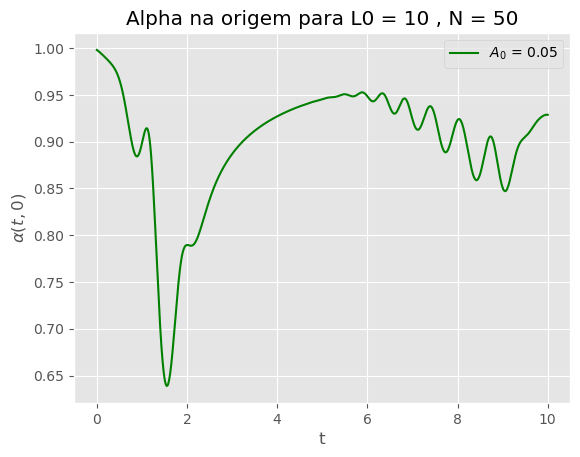

In [58]:
# Searching for critical amplitude:
%matplotlib inline

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 10 , N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
#plt.grid()
plt.legend()

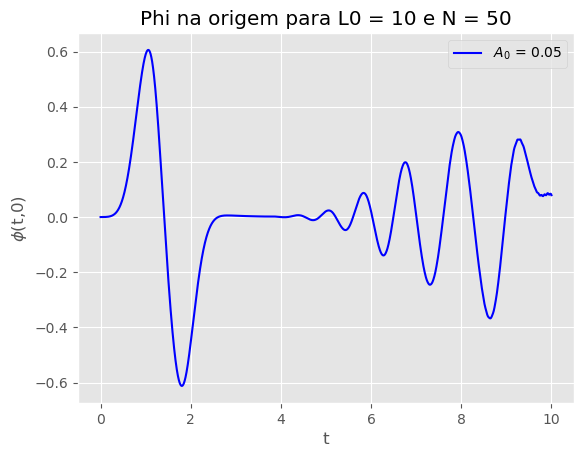

In [59]:
#%matplotlib notebook

#width = 12
#height = 10
#plt.figure(figsize=(width, height))

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 10 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
#plt.grid()
plt.legend() 

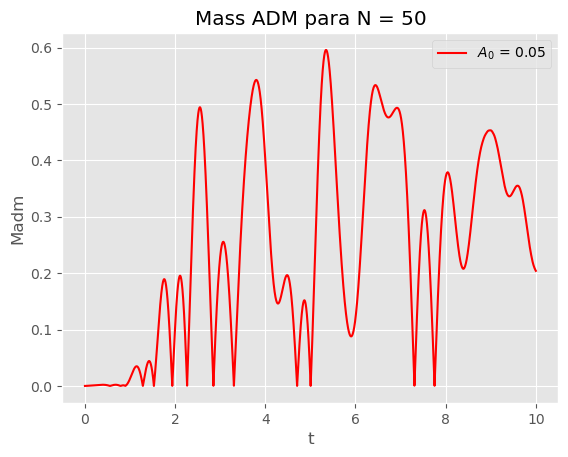

In [63]:
# Mass ADM error

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.yscale('log')
#plt.grid()
plt.legend() 

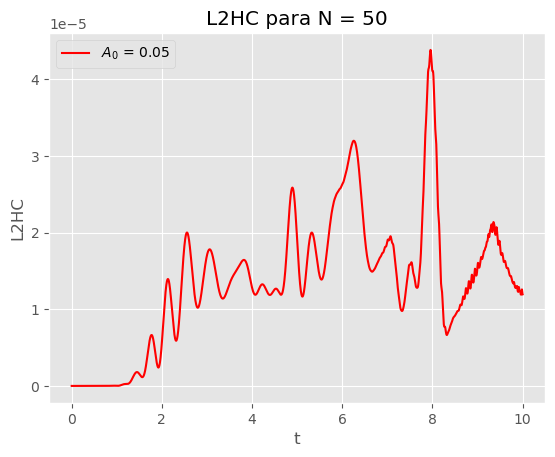

In [61]:
plt.plot(t1, L2HC, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("L2HC para N = {:}".format(N) )
plt.ylabel("L2HC")
plt.xlabel("t")  
#plt.yscale('log')
#plt.grid()
plt.legend() 

In [7]:
# N = 50

#L2HC_50_L02 = max(L2HC)
#Madm_50_L02 = max(Madm_error)

#L2HC_50_L05 = max(L2HC)
#Madm_50_L05 = max(Madm_error)

#L2HC_50_L010 = max(L2HC)
#Madm_50_L010 = max(Madm_error)


L2HC_50_L02 =0.000144049930376764
L2HC_50_L05 =4.1647240638286915e-05
L2HC_50_L010 =2.1862668015731047e-05

Madm_50_L02 =0.5940391212917088
Madm_50_L05 =0.43441404662021305
Madm_50_L010 =0.42017665709263313


In [56]:
L2HC_50_L02

0.000144049930376764

In [57]:
print('L2HC_50_L02 =',L2HC_50_L02,'L2HC_50_L05 =', L2HC_50_L05, 'L2HC_50_L010 =',L2HC_50_L010, sep = '\n')

L2HC_50_L02 =
0.000144049930376764
L2HC_50_L05 =
4.1647240638286915e-05
L2HC_50_L010 =
2.1862668015731047e-05


In [59]:
print('Madm_50_L02 =',Madm_50_L02,'Madm_50_L05 =', Madm_50_L05, 'Madm_50_L010 =',Madm_50_L010, sep = '\n')

Madm_50_L02 =
0.5940391212917088
Madm_50_L05 =
0.43441404662021305
Madm_50_L010 =
0.42017665709263313


In [3]:
# N = 100

L2HC_100_L02 =0.0001100464462587973
L2HC_100_L05 =3.97136992627332e-05
L2HC_100_L010 =2.0611825815582407e-05

Madm_100_L02 =0.467036228504049
Madm_100_L05 =0.22656180476940802
Madm_100_L010 =0.09049743427834477


In [4]:
# N = 150


L2HC_150_L02 =0.00011177392818705288
L2HC_150_L05 =3.963527618008934e-05
L2HC_150_L010 =2.0553633609668318e-05

Madm_150_L02 =0.3608108342198835
Madm_150_L05 =0.12626544396286632
Madm_150_L010 =0.03234764771134907

In [70]:
# N = 200



In [ ]:
# N = 250



NameError: name 'fig' is not defined

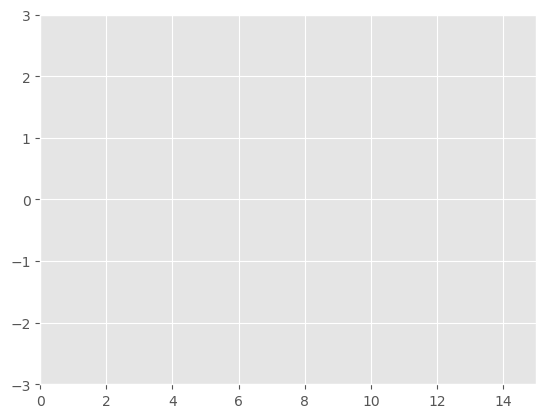

In [24]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())

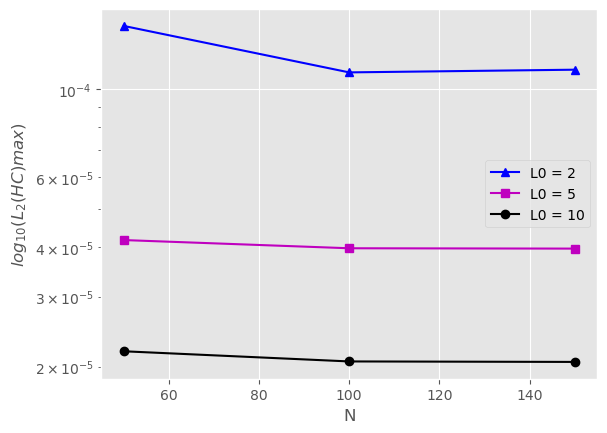

In [8]:
# Numerical test: L2 error of maximum Hamiltonian Constraint


L2HC_L02 = [L2HC_50_L02, L2HC_100_L02, L2HC_150_L02]

L2HC_L05 = [L2HC_50_L05, L2HC_100_L05, L2HC_150_L05]

L2HC_L010 = [L2HC_50_L010, L2HC_100_L010, L2HC_150_L010]

N = [50,100,150]

N_max = 150

plt.plot(N, L2HC_L02, '-b^', label = "L0 = 2")
plt.plot(N, L2HC_L05, '-ms',label = "L0 = 5")
plt.plot(N, L2HC_L010, '-ko',label = "L0 = 10")
#plt.xticks(np.arange(N_max), step = 50)
plt.xlabel('N')
plt.ylabel('$log_{10}(L_2(HC)max)$')
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()

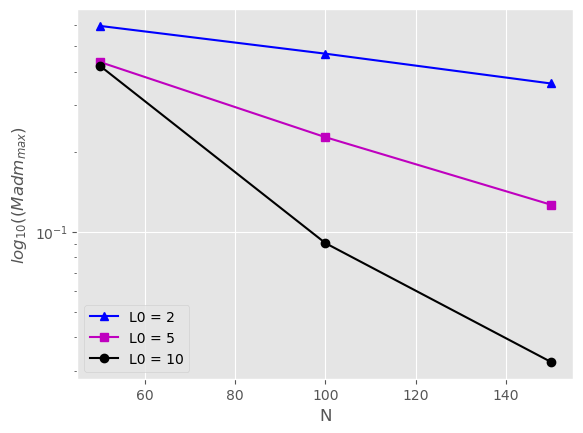

In [11]:
# Numerical test: L2 error of maximum ADM mass

Madm_L02 = [Madm_50_L02, Madm_100_L02, Madm_150_L02]

Madm_L05 = [Madm_50_L05, Madm_100_L05, Madm_150_L05]

Madm_L010 = [Madm_50_L010, Madm_100_L010, Madm_150_L010]

N = [50,100,150]

N_max = 150

plt.plot(N, Madm_L02, '-b^', label = "L0 = 2")
plt.plot(N, Madm_L05, '-ms',label = "L0 = 5")
plt.plot(N, Madm_L010, '-ko',label = "L0 = 10")
#plt.xticks(range(N_max), N)
plt.xlabel('N')
plt.ylabel('$log_{10}((Madm_{max})$')
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()